In [ ]:
!pip install langchain transformers sentence-transformers faiss-cpu beautifulsoup4 requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.1 MB/s eta 0:00:00


In [ ]:
!pip install -U langchain-huggingface

In [ ]:
import requests
import json
import pandas as pd
import os
import time
from bs4 import BeautifulSoup
from langchain.docstore.document import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import numpy as np
from google.colab import files
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt

In [ ]:
uploaded=files.upload()

Saving vulnerabilities_QA.xlsx to vulnerabilities_QA.xlsx


In [ ]:
df=pd.read_excel("vulnerabilities_QA.xlsx")

In [ ]:
df

,Report Name,Question,Answer
0,TALOS-2024-1984,What vulnerability was discovered in the Level...,A vulnerability in the LevelOne WBR-6012 route...
1,TALOS-2022-1528,What type of vulnerability affects the wget fu...,An OS command injection vulnerability affects ...
2,TALOS-2022-1529,What vulnerability affects the unzipDirectory ...,A directory traversal vulnerability exists in ...
3,TALOS-2022-1546,How does the OS command injection vulnerabilit...,The chunkfile functionality in WWBN AVideo 11....
4,TALOS-2022-1547,What is the impact of the directory traversal ...,The edittemplate functionality in the Helpdesk...
5,TALOS-2022-1548,What vulnerability affects the addDoc function...,A directory traversal vulnerability exists in ...
6,TALOS-2022-1473,What security risk is posed by the infactory_n...,The infactory_net functionality in InHand Netw...
7,TALOS-2022-1495,How can the infactory_wlan functionality vulne...,The infactory_wlan functionality in InHand Net...
8,TALOS-2022-1478,What is the nature of the vulnerability in the...,The infactory_port functionality in InHand Net...
9,TALOS-2022-1501,What is the vulnerability in the iburn firmwar...,The iburn firmware checks functionality in InH...


In [ ]:
#Step 3: Load LLM
model_id = "google/gemma-1.1-2b-it"
hf_token = "" #Your Token
similarity_model = SentenceTransformer("all-MiniLM-L6-v2")
embedding = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")


tokenizer = AutoTokenizer.from_pretrained(model_id, token=hf_token)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto",
    token=hf_token
)

def generate(prompt, max_new_tokens=150):
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    outputs = model.generate(**inputs, max_new_tokens=max_new_tokens)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

In [ ]:
def build_vectorstore(docs, chunk_count):
    return FAISS.from_documents(docs[:chunk_count], embedding)

In [ ]:
def scrape_page(url):
  try:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    target_section = soup.find("div", class_="report")
    if not target_section:
        print(f"Class report not found in {url}")
        return ""

    return target_section.get_text(separator="\n", strip=True)

  except Exception as e:
    print(f"Failed to process report: {e}")
    return []

def get_chunks_from_url(url, chunk_size=350, chunk_overlap=0):
    raw_text = scrape_page(url)

    if not raw_text.strip():
        print(f"No text found at {url}")
        return []

    splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    chunks = splitter.split_text(raw_text)
    chunked_docs = [Document(page_content=chunk, metadata={"source": url}) for chunk in chunks]
    return chunked_docs


def get_chunk_similarity_scores(db,query, chunk_count):
   results_with_scores = db.similarity_search_with_score(query, k=chunk_count)
   return results_with_scores

def get_semantic_similarity(rag_response, without_rag_response):
    embeddings = similarity_model.encode([rag_response, without_rag_response], convert_to_tensor=True)
    sim_score = float(util.pytorch_cos_sim(embeddings[0], embeddings[1])[0])
    return sim_score

def compute_entropy(similarities):
    probs = np.exp(similarities) / np.sum(np.exp(similarities))  # softmax
    print(probs)
    entropy = -np.sum(probs * np.log(probs + 1e-10))  # safe log
    print(entropy)
    return entropy, probs

def print_semantic_similarity(rag_score, nonrag_score, rag_response, chunk_count):
    print(f"RAG Similarity: {rag_score:.4f}\n")
    print(f"Non-RAG Similarity: {nonrag_score:.4f}\n")

def print_individual_chunk_similarity(results_with_scores):
    print()
    print("*" * 500)
    for i, (doc, score) in enumerate(results_with_scores, 1):
        print()
        print(f"Chunk {i} | Similarity Score: {score:.4f}")
        print("Chunk Text:", doc.page_content)
        print("Metadata:", doc.metadata)
        print("*" * 500)
        print()

def get_prompt(context, query):
      return f"""Use the context below to answer the question.

Context:
{context}

Question: {query}

Answer:"""

def evaluate_rag_with_uncertainty_prompt(query, chatgpt_answer, db, chunk_docs, current_chunk_count):
    chunk_number = current_chunk_count
    retriever = db.as_retriever(search_kwargs={"k": chunk_number})

    relevant_docs = retriever.invoke(query)
    context = "\n\n".join([doc.page_content for doc in relevant_docs])
    rag_prompt = get_prompt(context, query)

    rag_response = generate(rag_prompt)
    non_rag_response = generate(query)

    rag_response_clean = rag_response.split("Answer:")[-1].strip()

    parts = non_rag_response.strip().split("\n\n", 1)
    non_rag_response_clean = parts[1].strip() if len(parts) > 1 else non_rag_response.strip()

    rag_score = get_semantic_similarity(chatgpt_answer, rag_response_clean)
    nonrag_score = get_semantic_similarity(chatgpt_answer, non_rag_response_clean)

    print_semantic_similarity(rag_score, nonrag_score, rag_response, chunk_number)
    results_with_scores = get_chunk_similarity_scores(db, query, chunk_number)
    similarities = [1 - score for (_, score) in results_with_scores]

    plt.hist(similarities, bins=20)
    plt.title("Similarity score distribution")
    plt.xlabel("Similarity")
    plt.ylabel("Count")
    plt.show()

    #print_individual_chunk_similarity(results_with_scores)
    entropy, probs = compute_entropy(similarities)
    entropy_threshold = 1.5
    is_uncertain = entropy > entropy_threshold

    print(f"Entropy: {entropy:.4f}  {'Uncertain' if is_uncertain else 'Confident'}")

    return is_uncertain, rag_response_clean, non_rag_response_clean, rag_score, nonrag_score, entropy

RAG Similarity: 0.9119

Non-RAG Similarity: 0.7376



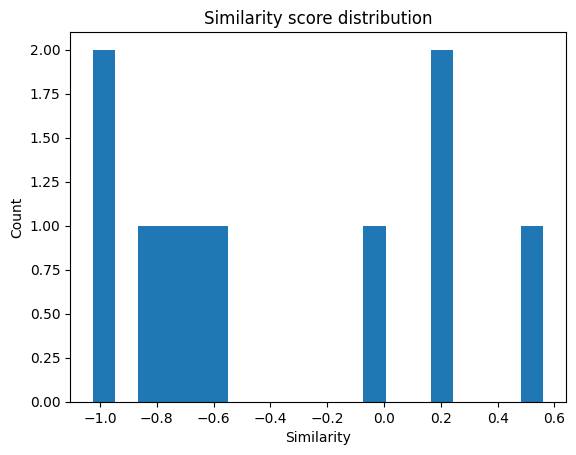

[0.22530055 0.15416224 0.15382318 0.12202238 0.06861387 0.06399875
 0.05918388 0.05779048 0.0490588  0.04604582]
2.150114
Entropy: 2.1501  Uncertain
Current chunk count: 15
RAG Similarity: 0.9100

Non-RAG Similarity: 0.7376



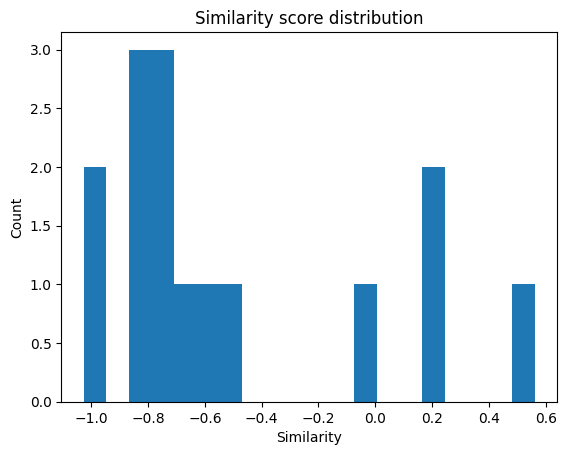

[0.17214453 0.11779016 0.11753109 0.09323318 0.05766476 0.05242554
 0.04889928 0.04630274 0.04544528 0.0452204  0.04415575 0.04349887
 0.04302226 0.03748417 0.03518206]
2.5674343
Entropy: 2.5674  Uncertain
Current chunk count: 20
RAG Similarity: 0.9100

Non-RAG Similarity: 0.7376



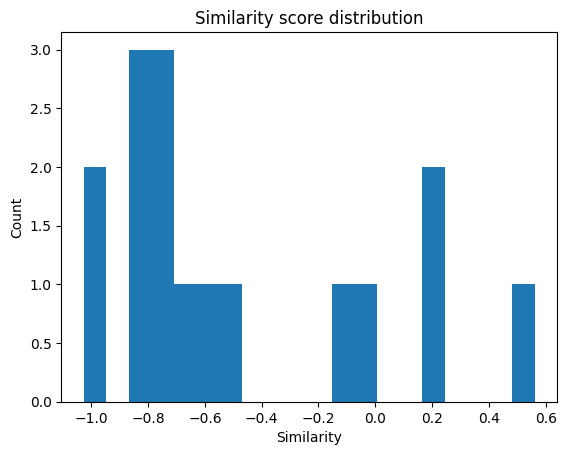

[0.15872447 0.10860746 0.10836859 0.0859649  0.07795805 0.05316933
 0.04833855 0.04508718 0.04269307 0.04190245 0.04169511 0.04071346
 0.04010778 0.03966832 0.03456198 0.03243933]
2.6410353
Entropy: 2.6410  Uncertain
No more chunks available to add.
RAG Similarity: 0.7270

Non-RAG Similarity: 0.7990



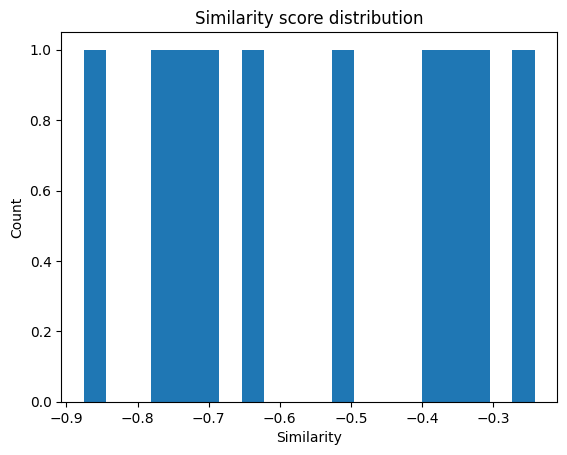

[0.13399424 0.12245408 0.12119877 0.11518813 0.10215256 0.08890351
 0.08586324 0.0808882  0.07827992 0.07107732]
2.28094
Entropy: 2.2809  Uncertain
Current chunk count: 15
RAG Similarity: 0.7270

Non-RAG Similarity: 0.7990



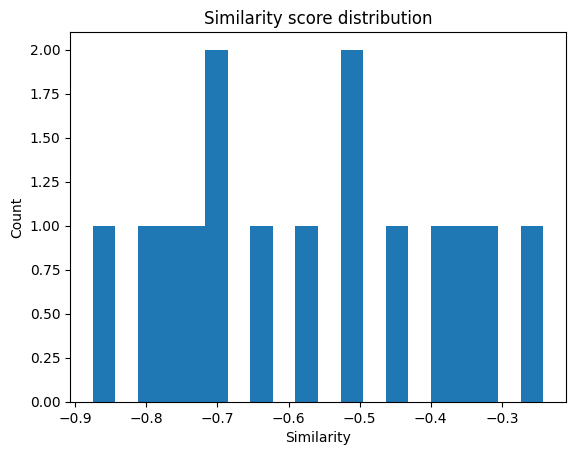

[0.09129007 0.08342778 0.08257254 0.0784775  0.07424531 0.06959639
 0.06953166 0.06499004 0.06056983 0.0584985  0.05753388 0.05510901
 0.05333199 0.05240066 0.04842487]
2.690342
Entropy: 2.6903  Uncertain
Current chunk count: 20
RAG Similarity: 0.7270

Non-RAG Similarity: 0.7990



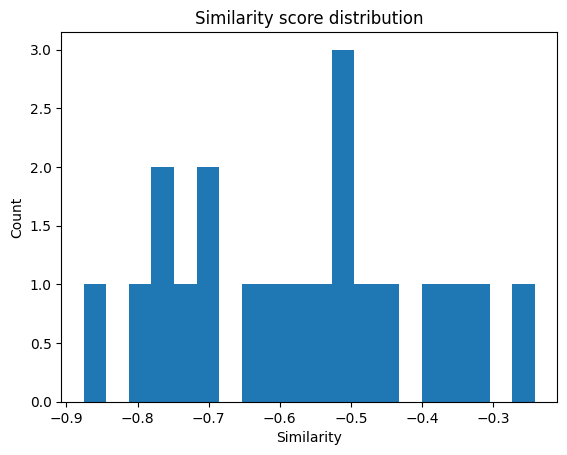

[0.06892384 0.06298782 0.06234211 0.05925037 0.05605507 0.05366256
 0.05254515 0.05249628 0.05242601 0.05142531 0.04906736 0.04714835
 0.04573011 0.04416626 0.04343797 0.0416072  0.04033963 0.04026556
 0.0395624  0.03656069]
2.9810543
Entropy: 2.9811  Uncertain
No more chunks available to add.
RAG Similarity: 0.7635

Non-RAG Similarity: 0.7051



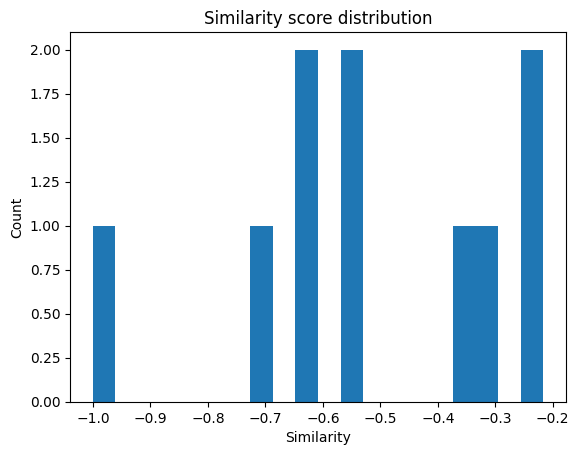

[0.13247134 0.12908095 0.11956816 0.11499617 0.09416642 0.09309734
 0.08811971 0.08758543 0.0804631  0.06045139]
2.2779381
Entropy: 2.2779  Uncertain
Current chunk count: 15
RAG Similarity: 0.7635

Non-RAG Similarity: 0.7051



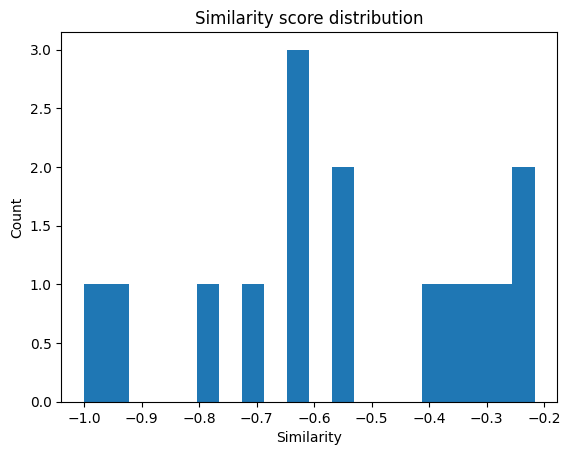

[0.09065673 0.08833651 0.08389954 0.08182644 0.07869761 0.07654759
 0.06444277 0.06371114 0.06030471 0.06028961 0.05993907 0.05506491
 0.05060098 0.04431243 0.0413699 ]
2.6815114
Entropy: 2.6815  Uncertain
Current chunk count: 20
RAG Similarity: 0.7635

Non-RAG Similarity: 0.7051



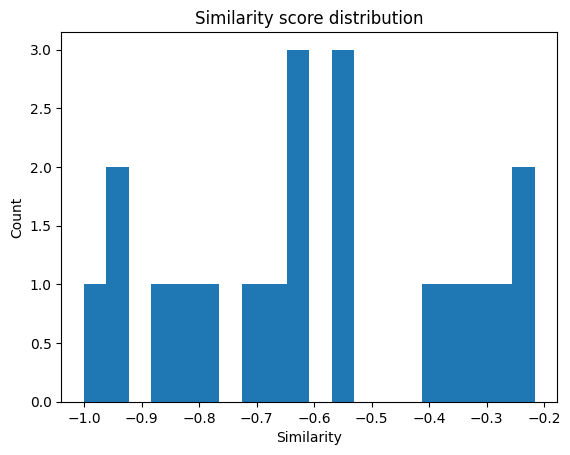

[0.07184371 0.07000498 0.06648876 0.06484587 0.06236633 0.06066248
 0.0511572  0.05106965 0.05048985 0.04779031 0.04777835 0.04750055
 0.04488575 0.04363788 0.0401003  0.03966065 0.03715827 0.03511674
 0.03465749 0.03278484]
2.9676323
Entropy: 2.9676  Uncertain
Current chunk count: 25
RAG Similarity: 0.7635

Non-RAG Similarity: 0.7051



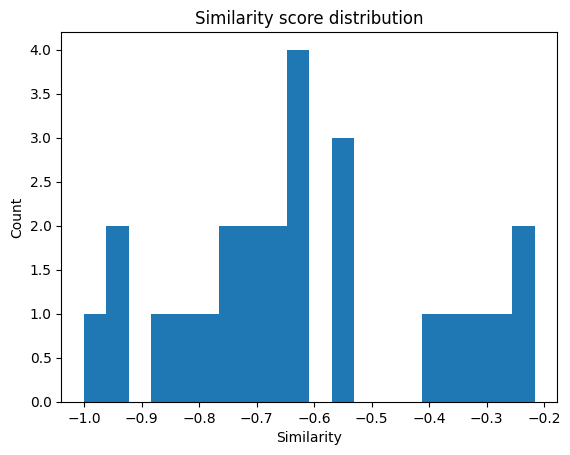

[0.05881352 0.05730828 0.05442979 0.05308488 0.05105504 0.04966022
 0.04187889 0.04180722 0.04133258 0.03969493 0.03912266 0.03911287
 0.03888545 0.03719819 0.03674489 0.03574315 0.03572334 0.03472519
 0.03400705 0.03282737 0.03246746 0.03041893 0.02874767 0.02837172
 0.0268387 ]
3.1944828
Entropy: 3.1945  Uncertain
Current chunk count: 30
RAG Similarity: 0.7635

Non-RAG Similarity: 0.7051



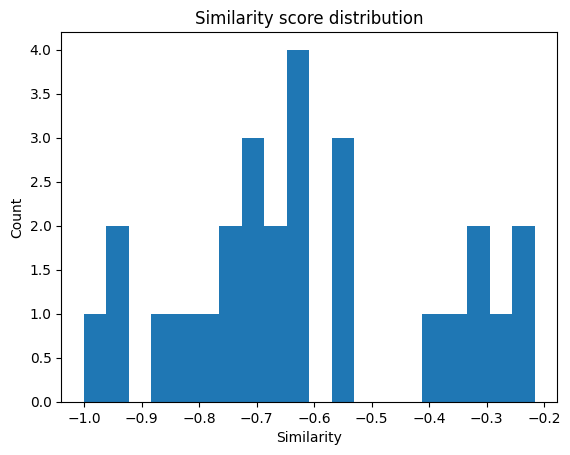

[0.05406441 0.05268072 0.05003466 0.04879835 0.04821849 0.04693242
 0.04565023 0.03849724 0.03843135 0.03799503 0.03648962 0.03596356
 0.03595456 0.03574551 0.03419449 0.03377779 0.03285694 0.03283873
 0.03253011 0.03192118 0.03126103 0.0301766  0.02984576 0.02796265
 0.02642634 0.02608074 0.02467152]
3.2715635
Entropy: 3.2716  Uncertain
No more chunks available to add.
RAG Similarity: 0.9506

Non-RAG Similarity: 0.8735



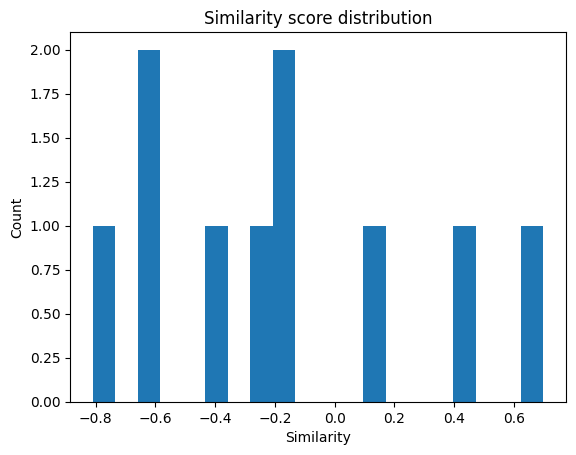

[0.21567646 0.16258006 0.12179525 0.09027088 0.08954486 0.08373539
 0.07335728 0.0584677  0.0569477  0.04762437]
2.1892774
Entropy: 2.1893  Uncertain
Current chunk count: 15
RAG Similarity: 0.9644

Non-RAG Similarity: 0.8735



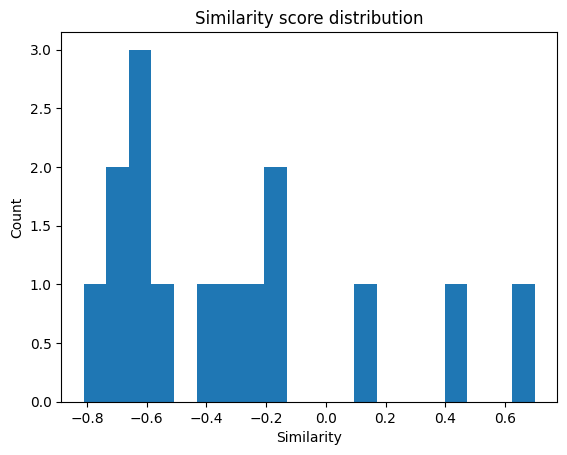

[0.16566932 0.12488395 0.09355558 0.0693405  0.06878283 0.06432035
 0.05775473 0.05634852 0.04813547 0.04491127 0.04392271 0.04374371
 0.04217501 0.03987389 0.0365821 ]
2.5942829
Entropy: 2.5943  Uncertain
Current chunk count: 20
RAG Similarity: 0.9722

Non-RAG Similarity: 0.8735



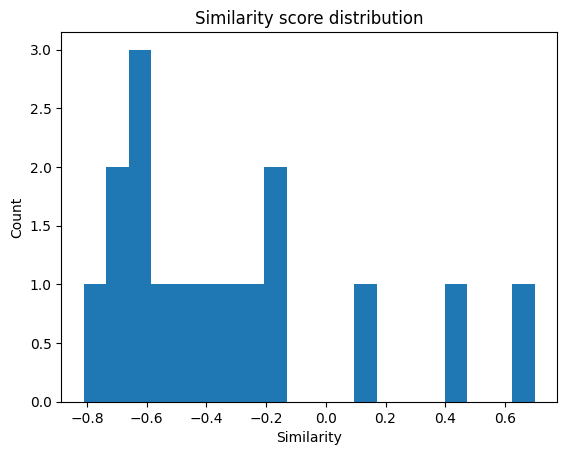

[0.15748061 0.11871118 0.08893131 0.06591314 0.06538303 0.06114112
 0.05490002 0.05356333 0.04942809 0.04575623 0.04269139 0.0417517
 0.04158154 0.04009039 0.037903   0.03477392]
2.6628804
Entropy: 2.6629  Uncertain
No more chunks available to add.
RAG Similarity: 0.8005

Non-RAG Similarity: 0.7873



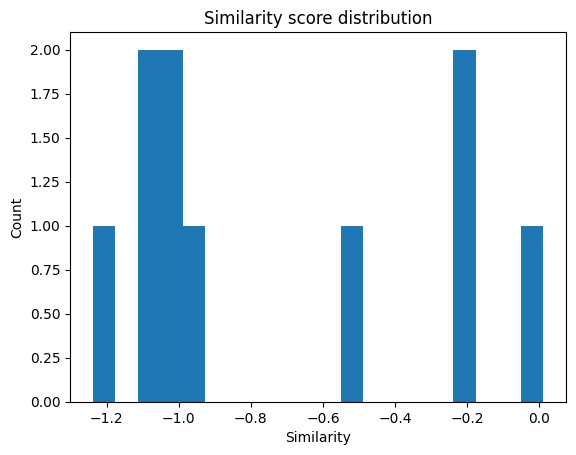

[0.18973838 0.15672776 0.150477   0.1127064  0.07316085 0.06876358
 0.06835444 0.06326897 0.06251576 0.05428685]
2.2017803
Entropy: 2.2018  Uncertain
Current chunk count: 15
RAG Similarity: 0.8005

Non-RAG Similarity: 0.7873



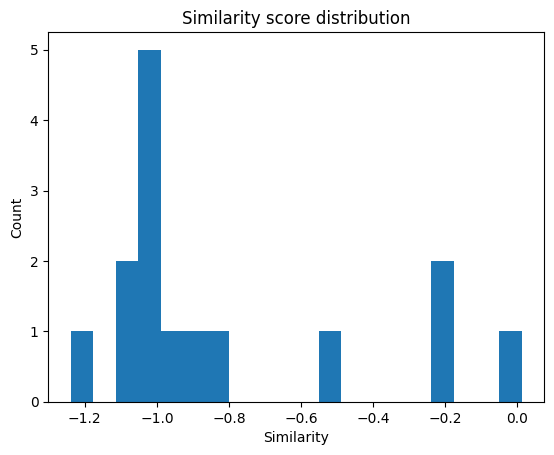

[0.13913931 0.1149319  0.11034809 0.08265008 0.06088957 0.05614113
 0.05365046 0.05106415 0.05042584 0.05012581 0.04975089 0.0488324
 0.04639653 0.04584418 0.03980973]
2.6227903
Entropy: 2.6228  Uncertain
Current chunk count: 20
RAG Similarity: 0.8005

Non-RAG Similarity: 0.7873



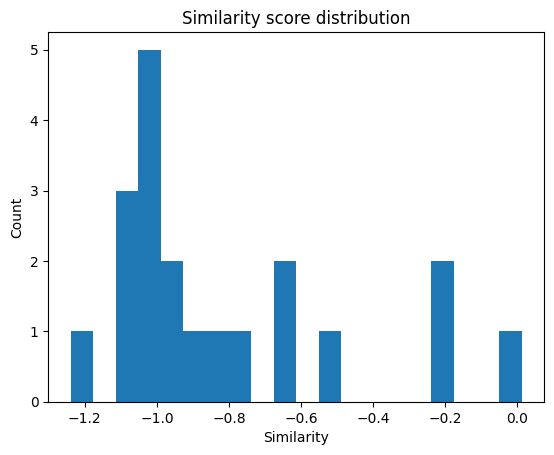

[0.10642471 0.08790898 0.08440292 0.06321729 0.05670792 0.05467797
 0.04770242 0.04657314 0.04294116 0.0410361  0.039799   0.03905788
 0.03856966 0.03834017 0.0380534  0.03735087 0.03623383 0.03548772
 0.03506524 0.03044962]
2.926458
Entropy: 2.9265  Uncertain
Current chunk count: 25
RAG Similarity: 0.8005

Non-RAG Similarity: 0.7873



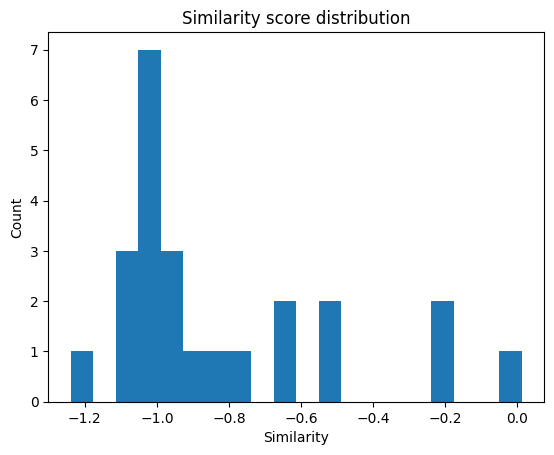

[0.09020188 0.07450859 0.07153698 0.05419479 0.05358078 0.04806366
 0.04634314 0.04043091 0.03947378 0.03639543 0.03478077 0.03373225
 0.03359545 0.03310411 0.03271706 0.0326903  0.0324958  0.03225274
 0.03192751 0.03165729 0.03071053 0.03007816 0.02972008 0.02580804]
3.1143844
Entropy: 3.1144  Uncertain
No more chunks available to add.
RAG Similarity: 0.6600

Non-RAG Similarity: 0.7273



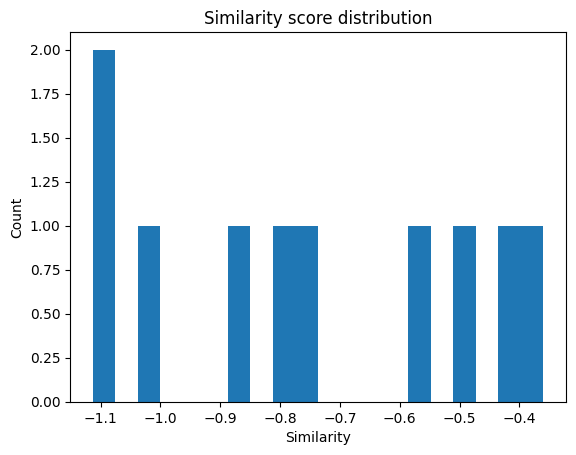

[0.14259876 0.13416936 0.12462734 0.11739546 0.09490577 0.09160011
 0.08491923 0.07411499 0.06855064 0.0671183 ]
2.2680073
Entropy: 2.2680  Uncertain
Current chunk count: 15
RAG Similarity: 0.6600

Non-RAG Similarity: 0.7273



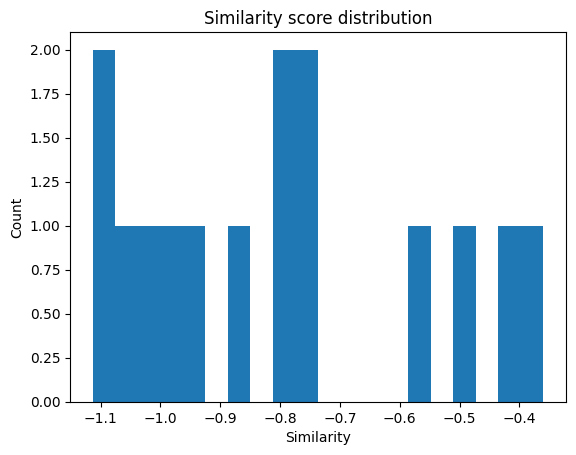

[0.10079424 0.09483601 0.08809135 0.08297958 0.06783995 0.06708302
 0.06489964 0.06474644 0.06002415 0.05612803 0.05418581 0.05238729
 0.0501085  0.0484542  0.04744177]
2.6780076
Entropy: 2.6780  Uncertain
Current chunk count: 20
RAG Similarity: 0.6600

Non-RAG Similarity: 0.7273



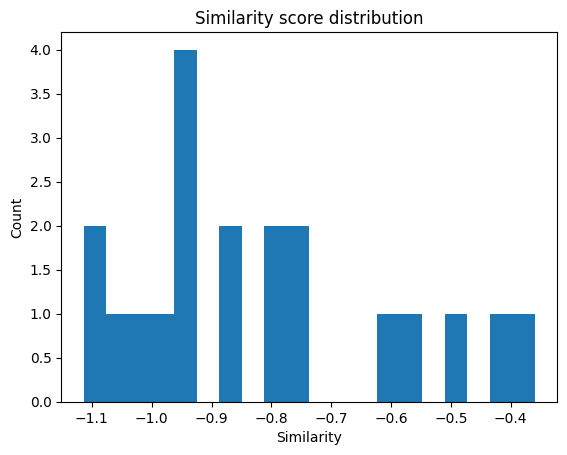

[0.0771118  0.07255351 0.06739356 0.06348284 0.06010987 0.05190039
 0.05132131 0.04965093 0.04953373 0.04673029 0.04592098 0.04316616
 0.04294029 0.04251856 0.04243338 0.0414544  0.04007846 0.0383351
 0.03706949 0.03629494]
2.9698462
Entropy: 2.9698  Uncertain
Current chunk count: 25
RAG Similarity: 0.6600

Non-RAG Similarity: 0.7273



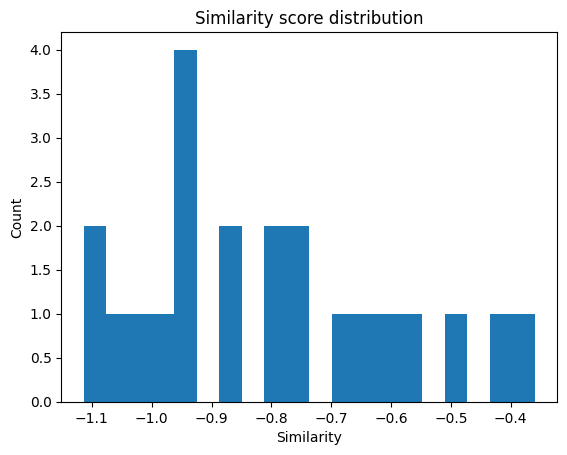

[0.06913234 0.06504574 0.06041974 0.0569137  0.05388975 0.05255175
 0.05092739 0.04652979 0.04601062 0.0445131  0.04440803 0.04189469
 0.04116912 0.03869937 0.03849686 0.03811878 0.03804241 0.03716474
 0.03593118 0.03436822 0.03323357 0.03253917]
3.0669036
Entropy: 3.0669  Uncertain
No more chunks available to add.
RAG Similarity: 0.8082

Non-RAG Similarity: 0.7870



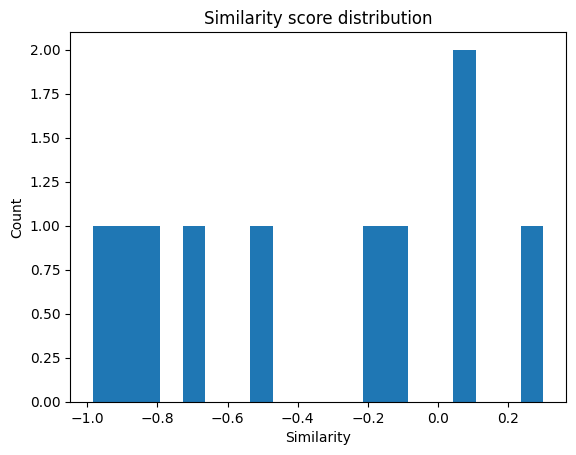

[0.17972271 0.14203234 0.1419438  0.11887243 0.10800017 0.08045689
 0.06453842 0.05873536 0.05601106 0.04968683]
2.213036
Entropy: 2.2130  Uncertain
Current chunk count: 15
RAG Similarity: 0.8082

Non-RAG Similarity: 0.7870



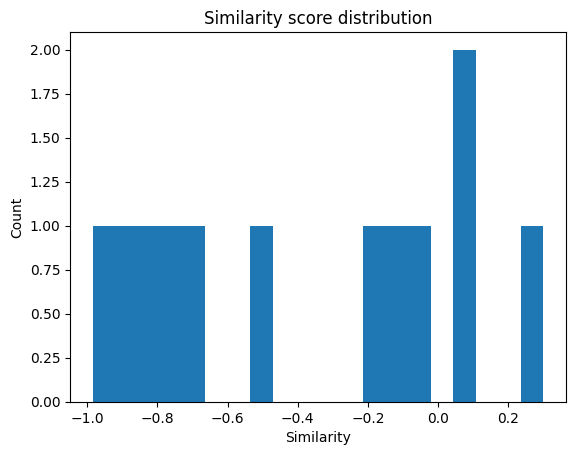

[0.15126136 0.11953974 0.11946522 0.10526948 0.10004748 0.09089699
 0.06771553 0.05431795 0.05309301 0.04943388 0.04714101 0.04181829]
2.400529
Entropy: 2.4005  Uncertain
No more chunks available to add.
RAG Similarity: 0.8549

Non-RAG Similarity: 0.8601



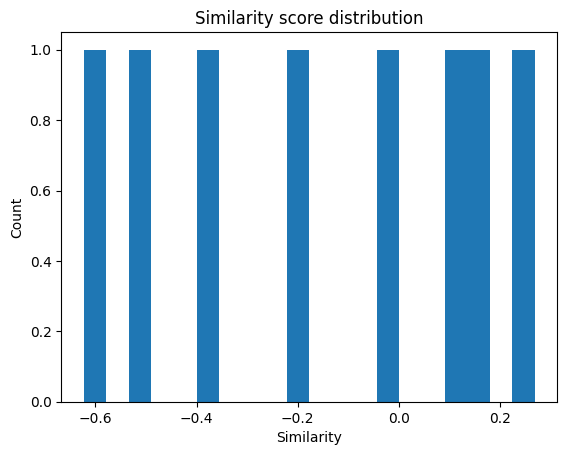

[0.18187372 0.16172995 0.1525219  0.1360409  0.11217224 0.09603078
 0.08509592 0.07453453]
2.0364337
Entropy: 2.0364  Uncertain
No more chunks available to add.
RAG Similarity: 0.8348

Non-RAG Similarity: 0.8970



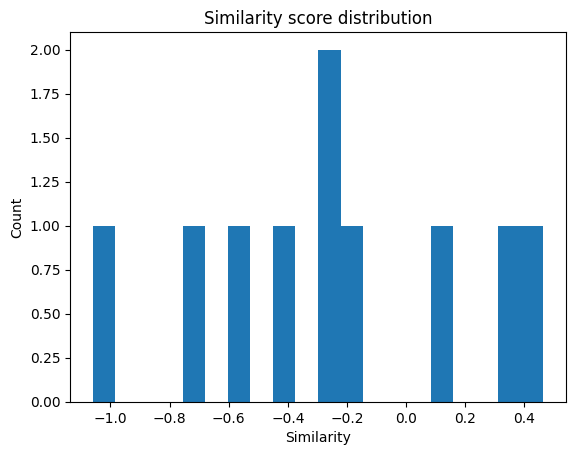

[0.18629943 0.16061604 0.1308463  0.09497768 0.09268679 0.09056658
 0.07934312 0.06807046 0.05604998 0.04054363]
2.2098854
Entropy: 2.2099  Uncertain
Current chunk count: 15
RAG Similarity: 0.8375

Non-RAG Similarity: 0.8970



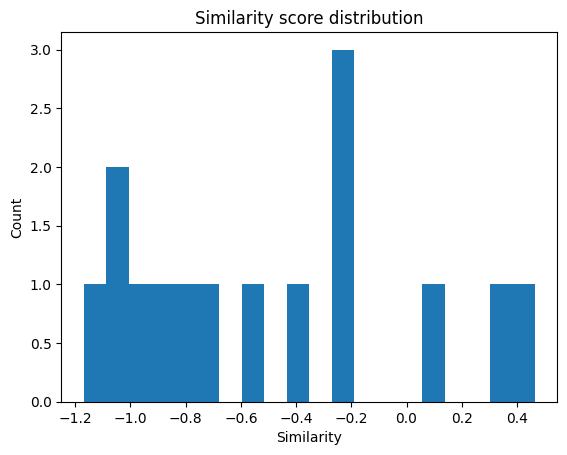

[0.15185997 0.13092443 0.10665795 0.07742003 0.07555263 0.07382437
 0.06467568 0.0554869  0.04568853 0.04398394 0.03993414 0.03663941
 0.03464505 0.0330487  0.02965837]
2.5759764
Entropy: 2.5760  Uncertain
Current chunk count: 20
RAG Similarity: 0.8343

Non-RAG Similarity: 0.8970



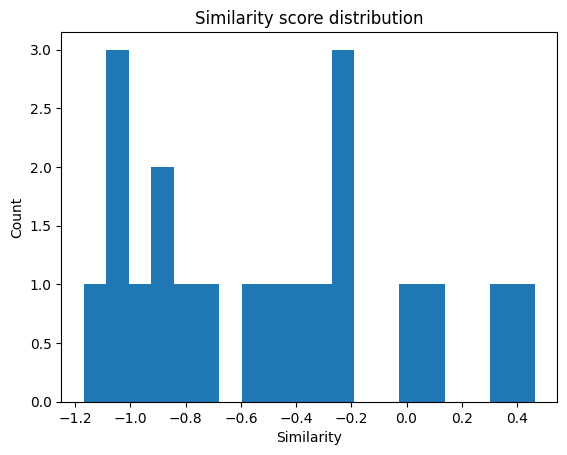

[0.11699051 0.1008621  0.0821676  0.07288671 0.05964316 0.05820455
 0.05687312 0.05256172 0.04982512 0.04625419 0.04274622 0.03519772
 0.03388453 0.0310548  0.03076462 0.02822642 0.0268584  0.02669
 0.0254602  0.02284834]
2.8783128
Entropy: 2.8783  Uncertain
No more chunks available to add.
RAG Similarity: 0.8813

Non-RAG Similarity: 0.8829



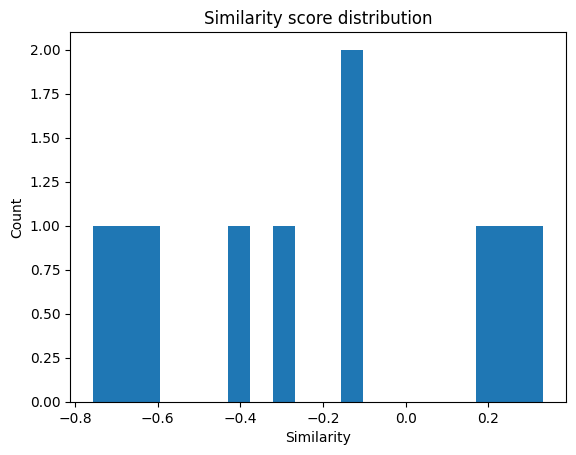

[0.16267543 0.14689636 0.14181694 0.1032983  0.1026148  0.08890793
 0.07615061 0.06337852 0.05961913 0.05464198]
2.235355
Entropy: 2.2354  Uncertain
Current chunk count: 15
RAG Similarity: 0.8791

Non-RAG Similarity: 0.8829



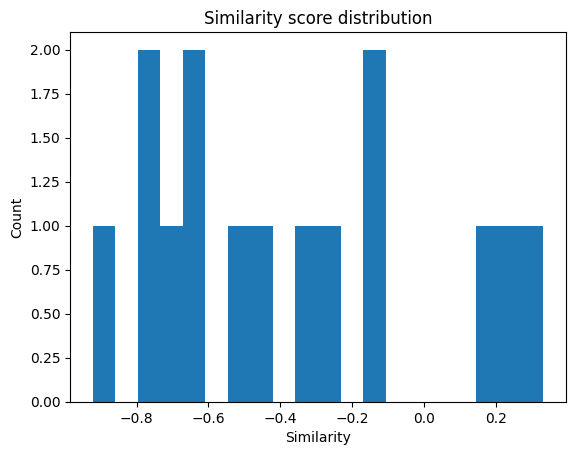

[0.12391471 0.11189533 0.10802618 0.07868538 0.07816474 0.06772381
 0.06414071 0.05800619 0.05475251 0.0482773  0.04541366 0.04293681
 0.04162242 0.04116263 0.03527769]
2.629748
Entropy: 2.6297  Uncertain
Current chunk count: 20
RAG Similarity: 0.8590

Non-RAG Similarity: 0.8829



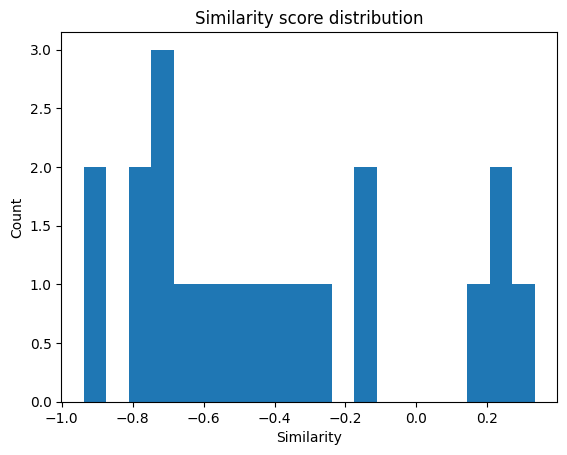

[0.09606289 0.08996764 0.08674506 0.08374557 0.06099958 0.06059596
 0.0525018  0.04972406 0.04496837 0.04244601 0.04118745 0.03742621
 0.03520621 0.03352207 0.03328607 0.03313486 0.03226711 0.03191067
 0.02734847 0.02695394]
2.9082024
Entropy: 2.9082  Uncertain
Current chunk count: 25
RAG Similarity: 0.8590

Non-RAG Similarity: 0.8829



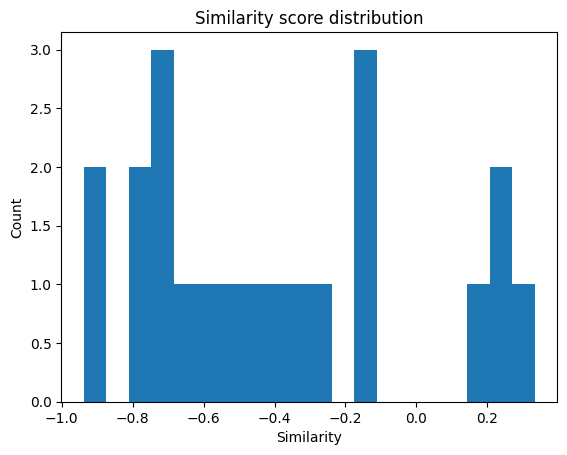

[0.09074593 0.08498804 0.08194382 0.07911035 0.05762333 0.05724205
 0.05534886 0.04959588 0.04697189 0.04247942 0.04009667 0.03890777
 0.03535471 0.03325759 0.03166666 0.03144373 0.03130088 0.03048117
 0.03014445 0.02583476 0.02546207]
2.96121
Entropy: 2.9612  Uncertain
No more chunks available to add.
RAG Similarity: 0.8411

Non-RAG Similarity: 0.7178



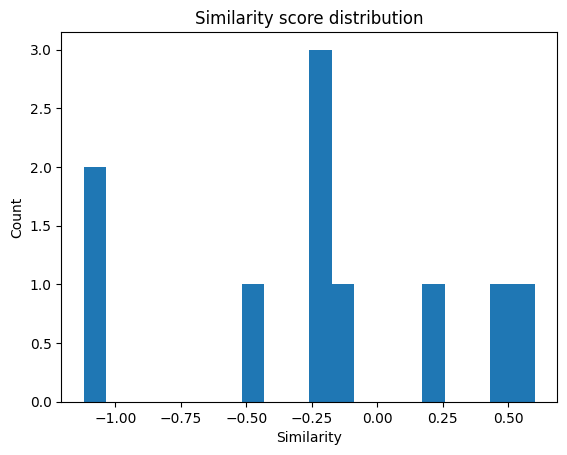

[0.19937812 0.17094606 0.1319186  0.09306858 0.09044295 0.08927717
 0.08512131 0.06748267 0.03674124 0.03562339]
2.1765141
Entropy: 2.1765  Uncertain
Current chunk count: 15
RAG Similarity: 0.8422

Non-RAG Similarity: 0.7178



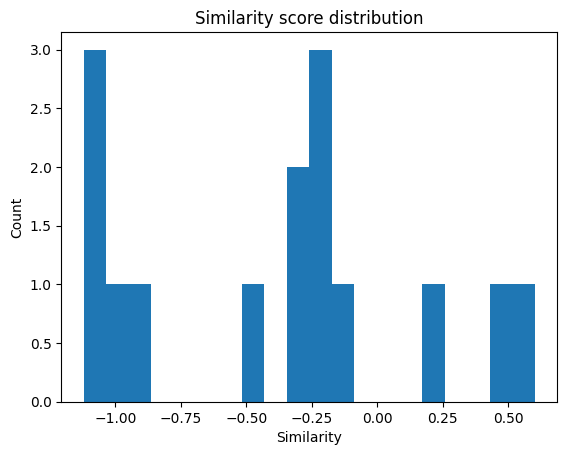

[0.15556085 0.1333773  0.10292689 0.07261493 0.07056633 0.06965676
 0.06641423 0.06384733 0.06080244 0.05265202 0.03448118 0.03197216
 0.02866663 0.02866663 0.02779445]
2.5657353
Entropy: 2.5657  Uncertain
Current chunk count: 20
RAG Similarity: 0.8422

Non-RAG Similarity: 0.7178



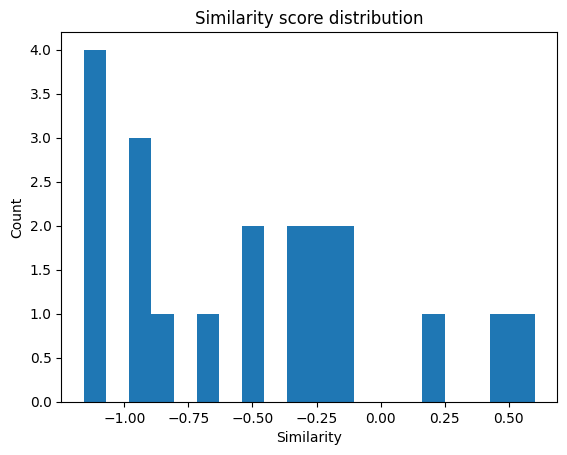

[0.1306524  0.11202089 0.0864462  0.06098781 0.05926723 0.05850329
 0.05577996 0.05362407 0.05106673 0.04422136 0.04285477 0.03531773
 0.03092768 0.02896005 0.02855376 0.02685277 0.02407652 0.02407652
 0.023344   0.02246634]
2.8488557
Entropy: 2.8489  Uncertain
Current chunk count: 25
RAG Similarity: 0.8870

Non-RAG Similarity: 0.7178



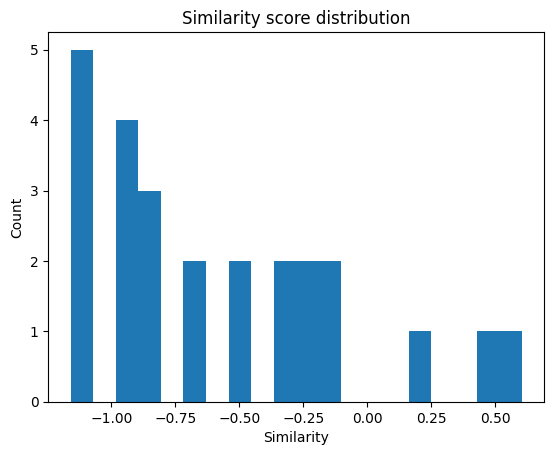

[0.11344633 0.09726846 0.0750618  0.05295611 0.05146212 0.05079879
 0.0484341  0.04656213 0.04434158 0.0383977  0.03721108 0.03233399
 0.03066662 0.02722866 0.02705969 0.02685471 0.0251462  0.02479342
 0.02475263 0.02331643 0.0209058  0.0209058  0.02031855 0.02026974
 0.01950767]
3.073769
Entropy: 3.0738  Uncertain
Current chunk count: 30
RAG Similarity: 0.8855

Non-RAG Similarity: 0.7178



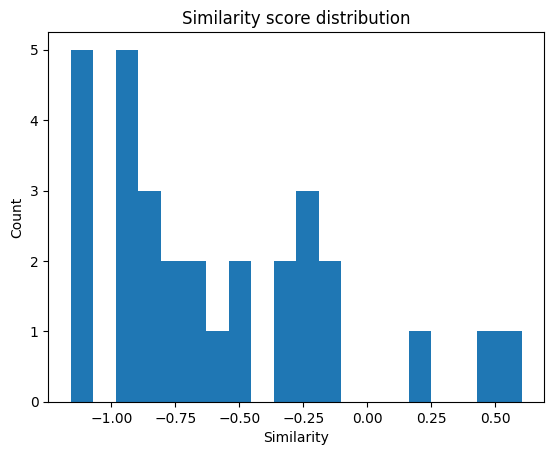

[0.09718653 0.08332737 0.06430349 0.04536612 0.04408626 0.04362646
 0.04351801 0.04149224 0.03988857 0.03798628 0.03289431 0.03187776
 0.02849907 0.02769969 0.02627129 0.02560709 0.02556784 0.02332608
 0.02318134 0.02300573 0.02154209 0.02123988 0.02120494 0.02002529
 0.01997458 0.01790945 0.01790945 0.01740638 0.01736456 0.01671172]
3.269686
Entropy: 3.2697  Uncertain
Current chunk count: 35
RAG Similarity: 0.8704

Non-RAG Similarity: 0.7178



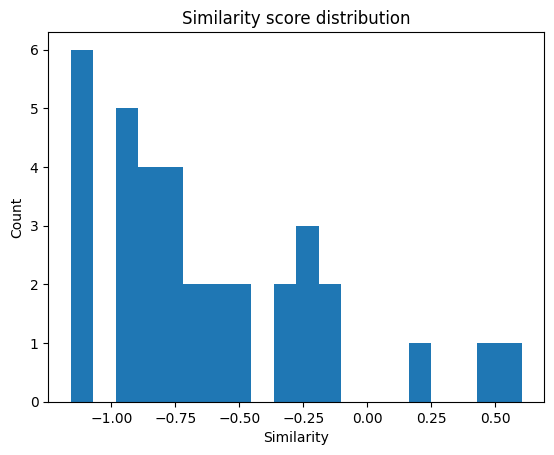

[0.08686033 0.07447372 0.05747116 0.04054591 0.03940204 0.0389911
 0.03889416 0.03708363 0.03565035 0.03395019 0.02939925 0.02849071
 0.02566794 0.02547101 0.02475656 0.02347993 0.0228863  0.02285123
 0.02229525 0.02178054 0.02084766 0.02084766 0.02071829 0.02056134
 0.01925322 0.01898311 0.01895189 0.01789758 0.01785226 0.01600655
 0.01600655 0.01566004 0.01555693 0.01551955 0.01493607]
3.430612
Entropy: 3.4306  Uncertain
Current chunk count: 40
RAG Similarity: 0.6969

Non-RAG Similarity: 0.7178



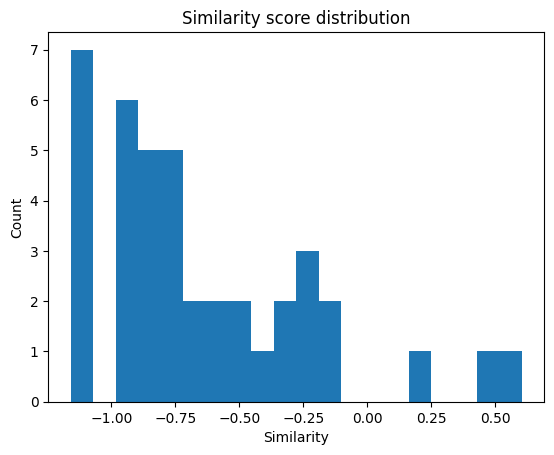

[0.07845743 0.06726911 0.05191138 0.03662349 0.03559027 0.03521908
 0.03513153 0.03349615 0.03220152 0.03066583 0.02807463 0.02655515
 0.02573451 0.02318481 0.02300693 0.0223616  0.02120848 0.02067227
 0.02064059 0.0201384  0.02007693 0.01967349 0.01883085 0.01883085
 0.01871399 0.01857223 0.01763349 0.01739065 0.01714668 0.01711847
 0.01703261 0.01616616 0.01612522 0.01445807 0.01445807 0.01414508
 0.01405194 0.01401819 0.01392275 0.01349115]
3.5694876
Entropy: 3.5695  Uncertain
Current chunk count: 45
RAG Similarity: 0.5736

Non-RAG Similarity: 0.7178



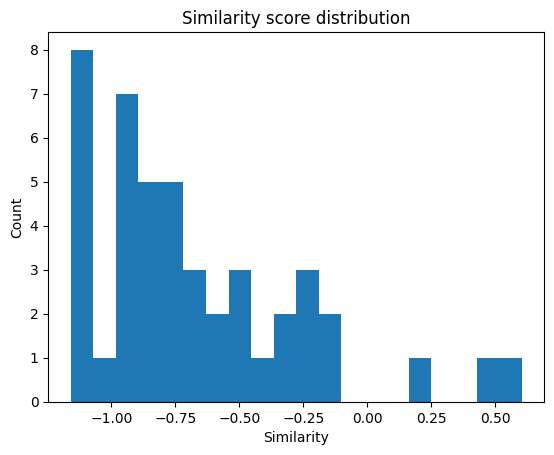

[0.07149117 0.06129627 0.04730216 0.03337168 0.0324302  0.03209197
 0.03201219 0.03052202 0.02934234 0.02794301 0.02558188 0.0247296
 0.02419731 0.02344953 0.02112622 0.02096414 0.02080436 0.02037611
 0.01932537 0.01883678 0.01880791 0.0183503  0.0182943  0.01792667
 0.01715885 0.01715885 0.01705237 0.01692319 0.01606781 0.01584653
 0.01562422 0.01562422 0.01559852 0.01552028 0.01473076 0.01469346
 0.01454152 0.01317433 0.01317433 0.01309055 0.01288913 0.01280427
 0.01277351 0.01268655 0.01229327]
3.6925988
Entropy: 3.6926  Uncertain
Current chunk count: 50
RAG Similarity: 0.2230

Non-RAG Similarity: 0.7178



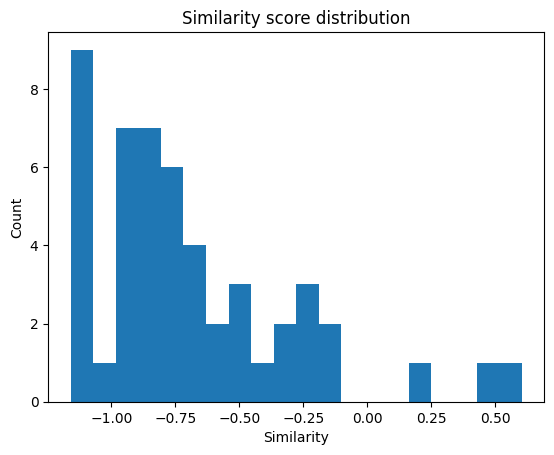

[0.06597482 0.05656657 0.04365226 0.03079668 0.02992784 0.02961571
 0.02954208 0.0281669  0.02707825 0.02578689 0.02360795 0.02282143
 0.02233022 0.02164014 0.0194961  0.01934652 0.01919907 0.01880386
 0.0178342  0.0178342  0.01738331 0.01735666 0.01693437 0.01688269
 0.01669033 0.01654343 0.01583485 0.01583485 0.01573659 0.01561738
 0.01561738 0.01561259 0.01482799 0.01462379 0.01441864 0.01441863
 0.01439492 0.01432272 0.01359412 0.01355969 0.01341948 0.01215779
 0.01215779 0.01208046 0.01189459 0.01181627 0.01178789 0.01170764
 0.01140675 0.0113447 ]
3.8028324
Entropy: 3.8028  Uncertain
Current chunk count: 55
RAG Similarity: 0.2310

Non-RAG Similarity: 0.7178



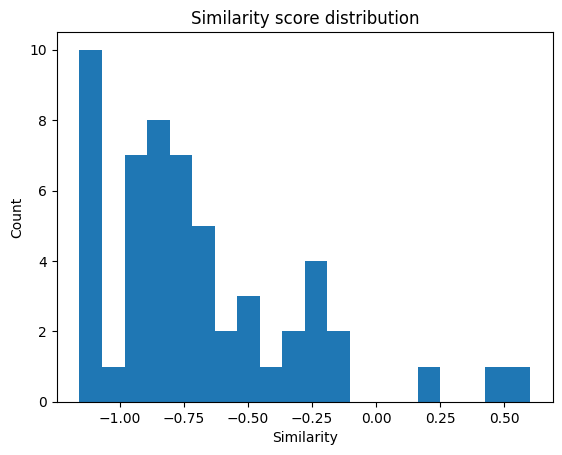

[0.06045422 0.05183322 0.03999955 0.02821969 0.02742356 0.02713755
 0.02707008 0.02581306 0.02580997 0.02481241 0.02362911 0.02163249
 0.02091179 0.02046168 0.01982935 0.01786471 0.01772765 0.01759255
 0.0172304  0.01687569 0.01634188 0.01634188 0.01592872 0.0159043
 0.01552019 0.01551735 0.01546999 0.01529372 0.01515912 0.01450983
 0.01450983 0.01441979 0.01438647 0.01431056 0.01431056 0.01430617
 0.01358723 0.01340011 0.01321212 0.01321212 0.01319039 0.01312423
 0.0124566  0.01242505 0.01229658 0.01114045 0.01114045 0.01108206
 0.0110696  0.01089928 0.01082752 0.01080151 0.01072797 0.01045226
 0.01039541]
3.9035423
Entropy: 3.9035  Uncertain
Current chunk count: 60
RAG Similarity: 0.2148

Non-RAG Similarity: 0.7178



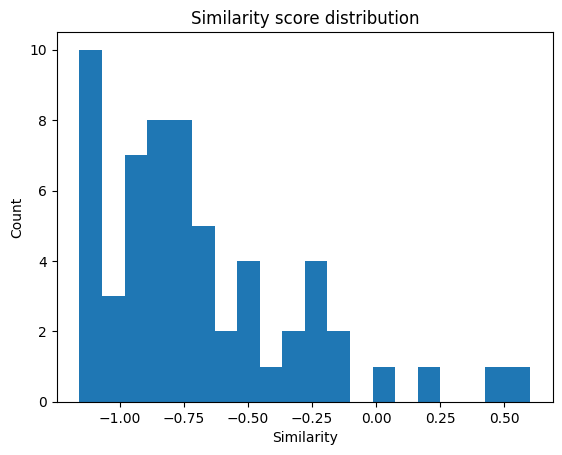

[0.05530762 0.04742055 0.0365943  0.0315357  0.02581728 0.02508893
 0.02482727 0.02476554 0.02361554 0.02361271 0.02270008 0.02161751
 0.01979087 0.01913152 0.01871973 0.01814123 0.017701   0.01634385
 0.01621846 0.01609485 0.01576354 0.01543902 0.01495066 0.01495066
 0.01457267 0.01455033 0.01419892 0.01419632 0.01415299 0.01399173
 0.01386859 0.01377603 0.01327458 0.01327458 0.0131922  0.01316172
 0.01309227 0.01309227 0.01308825 0.01243052 0.01225933 0.01208735
 0.01208734 0.01206746 0.01200693 0.01139614 0.01136728 0.01125385
 0.01124974 0.01086568 0.01019204 0.01019204 0.01013862 0.01012722
 0.0099714  0.00990575 0.00988195 0.00981468 0.00956244 0.00951042]
3.991702
Entropy: 3.9917  Uncertain
No more chunks available to add.
RAG Similarity: 0.9162

Non-RAG Similarity: 0.8086



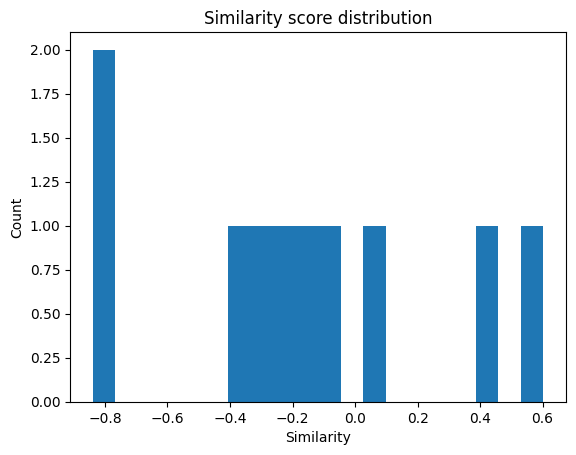

[0.19456443 0.16826078 0.11564329 0.09888892 0.09450213 0.08282766
 0.08041442 0.07224569 0.04666643 0.04598635]
2.2030828
Entropy: 2.2031  Uncertain
Current chunk count: 15
RAG Similarity: 0.9087

Non-RAG Similarity: 0.8086



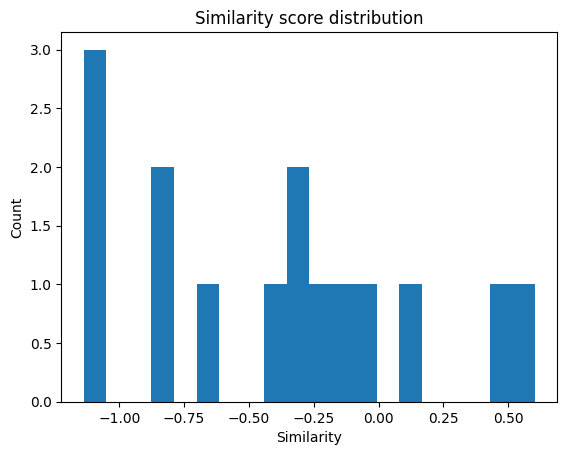

[0.15714902 0.13590364 0.09340469 0.07987224 0.07632904 0.06689961
 0.06495045 0.06278046 0.0583526  0.04479554 0.03769232 0.03714301
 0.02911593 0.02802335 0.02758818]
2.5670183
Entropy: 2.5670  Uncertain
Current chunk count: 20
RAG Similarity: 0.9057

Non-RAG Similarity: 0.8086



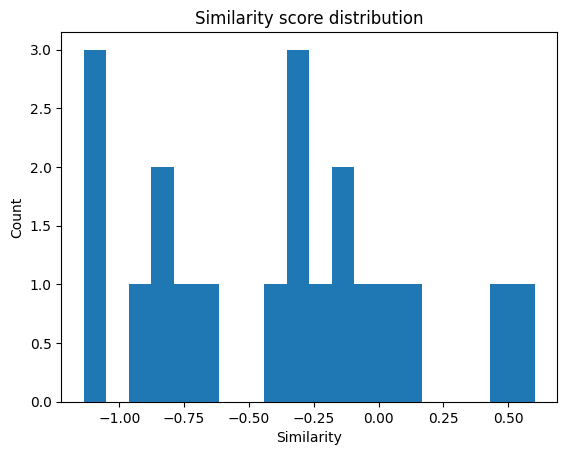

[0.1207203  0.10439982 0.07175255 0.06584789 0.06135705 0.0586352
 0.05782561 0.05139161 0.05012139 0.04989428 0.04822733 0.04482588
 0.03441149 0.03209858 0.02895486 0.02853289 0.02591655 0.02236656
 0.02152725 0.02119297]
2.873582
Entropy: 2.8736  Uncertain
No more chunks available to add.
RAG Similarity: 0.8984

Non-RAG Similarity: 0.7269



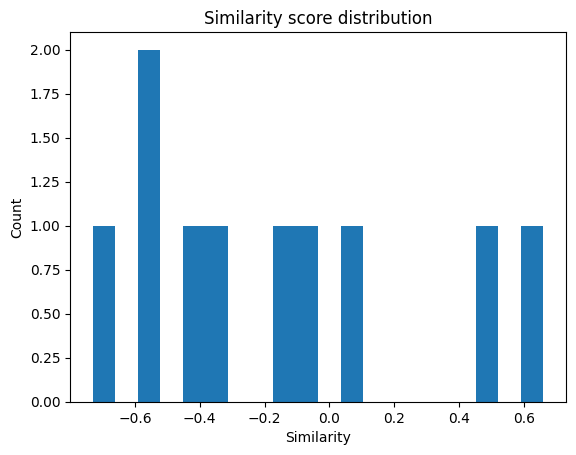

[0.20631896 0.17547818 0.11210272 0.09608015 0.09399132 0.0746289
 0.06855775 0.06078048 0.06068687 0.05137463]
2.1938467
Entropy: 2.1938  Uncertain
Current chunk count: 15
RAG Similarity: 0.8984

Non-RAG Similarity: 0.7269



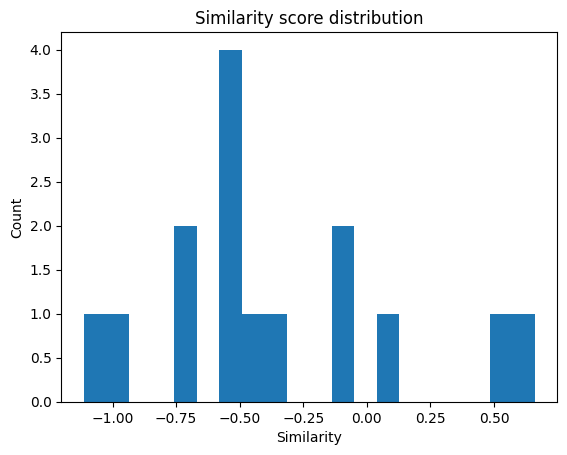

[0.16490744 0.1402569  0.08960191 0.07679532 0.07512576 0.05964969
 0.05479711 0.04993581 0.04973527 0.04858087 0.04850605 0.04159247
 0.04106292 0.03144022 0.02801227]
2.5726702
Entropy: 2.5727  Uncertain
Current chunk count: 20
RAG Similarity: 0.8984

Non-RAG Similarity: 0.7269



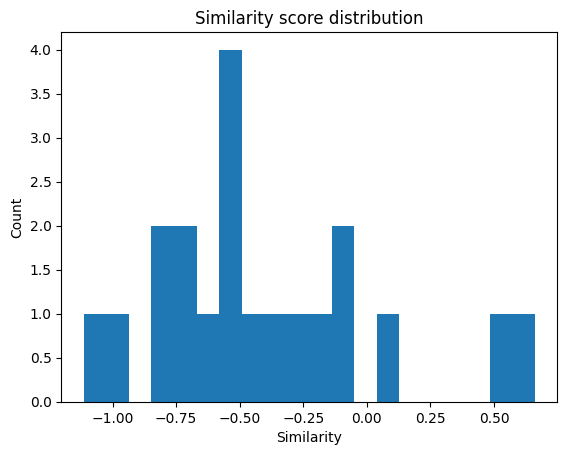

[0.13074014 0.11119696 0.07103723 0.06088404 0.0595604  0.05564141
 0.05378462 0.04729082 0.04344365 0.03958957 0.03943058 0.03851536
 0.03845604 0.03743264 0.03297489 0.03255506 0.03087525 0.02945685
 0.0249261  0.02220839]
2.8758261
Entropy: 2.8758  Uncertain
Current chunk count: 25
RAG Similarity: 0.8984

Non-RAG Similarity: 0.7269



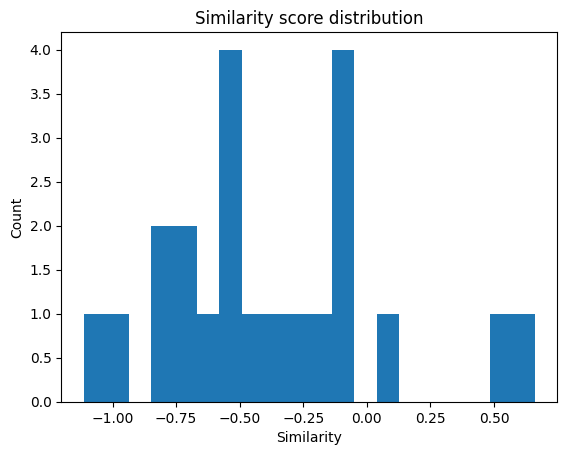

[0.11644664 0.09904008 0.0632709  0.05511403 0.05422774 0.05421352
 0.0530488  0.04955827 0.04790448 0.04212063 0.03869407 0.03526134
 0.03511973 0.03430457 0.03425173 0.03334022 0.02936983 0.0289959
 0.02749973 0.02623641 0.02220099 0.0197804 ]
2.9823027
Entropy: 2.9823  Uncertain
No more chunks available to add.
RAG Similarity: 0.9123

Non-RAG Similarity: 0.7939



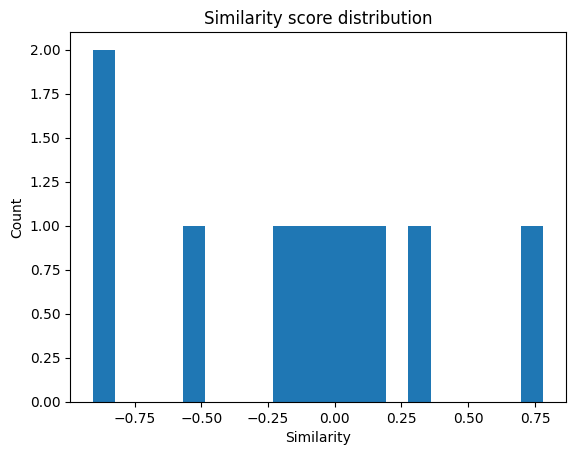

[0.21910001 0.14207725 0.1160211  0.10801371 0.09691805 0.09126977
 0.08611151 0.05840438 0.04161946 0.04046478]
2.184017
Entropy: 2.1840  Uncertain
Current chunk count: 15
RAG Similarity: 0.9088

Non-RAG Similarity: 0.7939



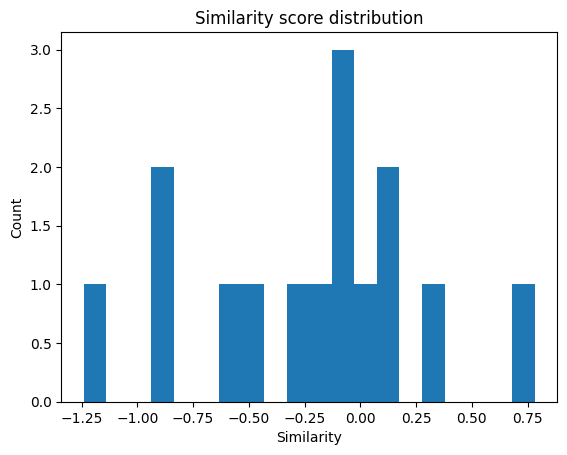

[0.1605779  0.10412809 0.08503159 0.079163   0.07243639 0.07103101
 0.06987251 0.06689139 0.06311093 0.05626091 0.04726394 0.04280443
 0.0305028  0.02965654 0.0212686 ]
2.592544
Entropy: 2.5925  Uncertain
Current chunk count: 20
RAG Similarity: 0.8991

Non-RAG Similarity: 0.7939



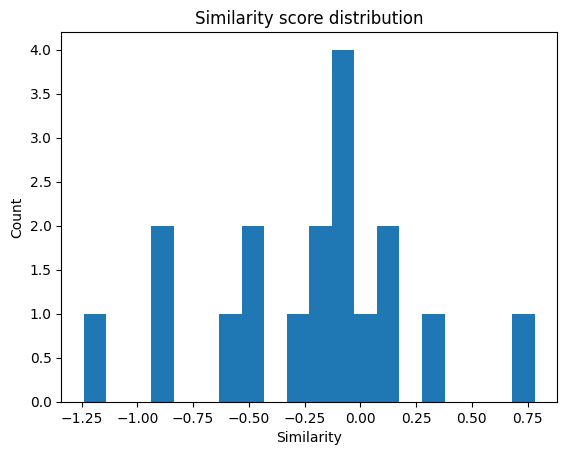

[0.13663965 0.08860514 0.07235546 0.06736173 0.0616379  0.06044203
 0.05945623 0.05851388 0.05691953 0.05370263 0.05252868 0.04787379
 0.04021804 0.03803286 0.03642334 0.02595558 0.02523548 0.01809797]
2.788628
Entropy: 2.7886  Uncertain
No more chunks available to add.
RAG Similarity: 0.5452

Non-RAG Similarity: 0.8794



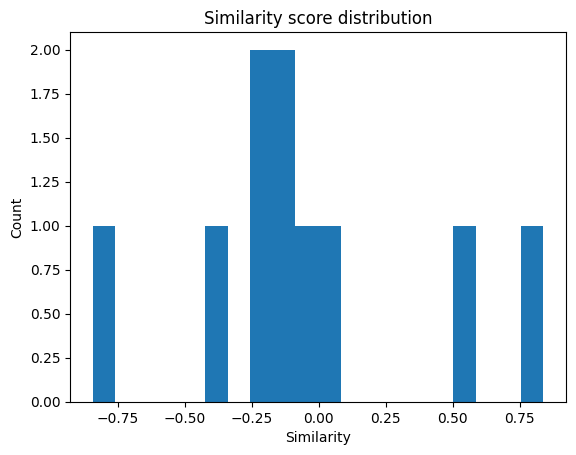

[0.21969053 0.16175878 0.10015696 0.09243973 0.08631978 0.08116393
 0.077631   0.07695024 0.06306776 0.04082132]
2.194094
Entropy: 2.1941  Uncertain
Current chunk count: 15
RAG Similarity: 0.6343

Non-RAG Similarity: 0.8794



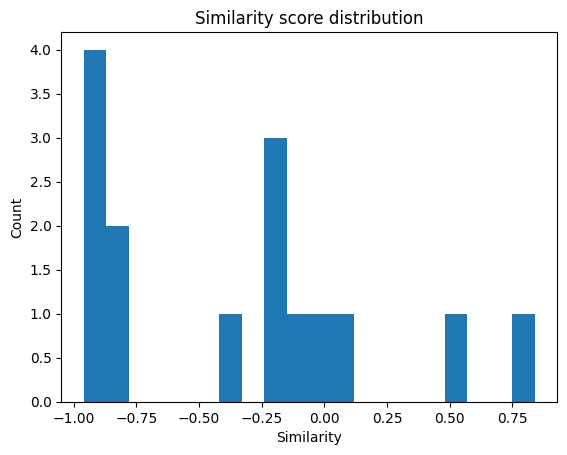

[0.18429212 0.13569483 0.08401882 0.07754506 0.0724112  0.0680861
 0.06512243 0.06455136 0.05290575 0.0348555  0.03424384 0.0326721
 0.03174107 0.03135682 0.03050307]
2.5412557
Entropy: 2.5413  Uncertain
Current chunk count: 20
RAG Similarity: 0.3599

Non-RAG Similarity: 0.8794



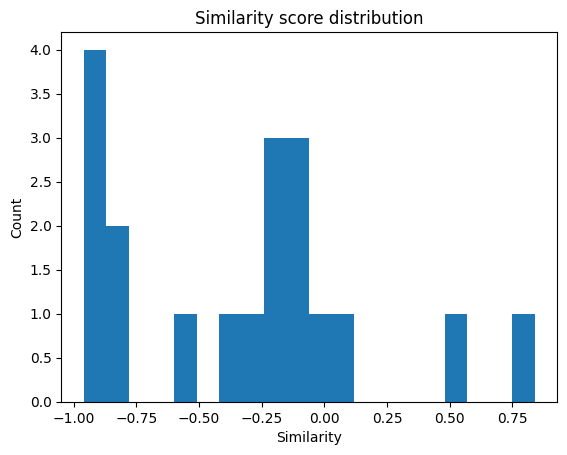

[0.1478999  0.10889913 0.0674276  0.06223221 0.05916572 0.05811214
 0.05659244 0.05464112 0.05226268 0.05180438 0.04648715 0.04245844
 0.03522494 0.02797258 0.0274817  0.02622033 0.02547315 0.02516478
 0.02447962]
2.8063037
Entropy: 2.8063  Uncertain
No more chunks available to add.
RAG Similarity: 0.8939

Non-RAG Similarity: 0.8642



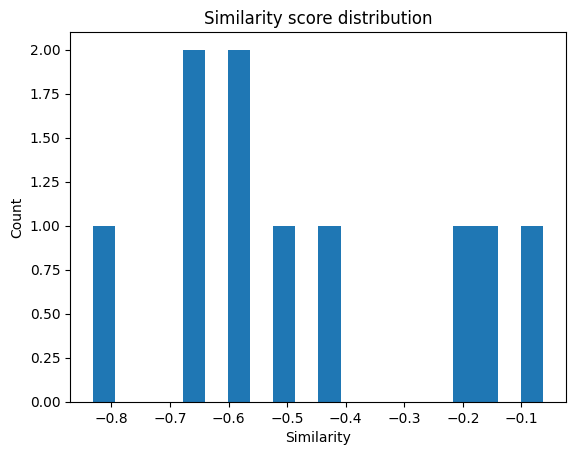

[0.14562327 0.13080728 0.12600702 0.09937289 0.09312877 0.08804357
 0.08697399 0.08155116 0.08105127 0.06744081]
2.2744243
Entropy: 2.2744  Uncertain
Current chunk count: 15
RAG Similarity: 0.8939

Non-RAG Similarity: 0.8642



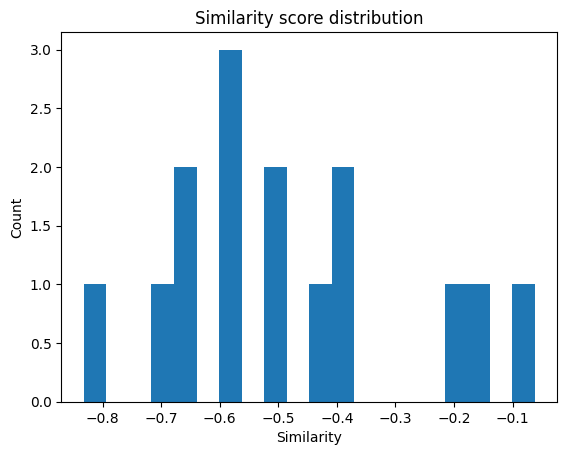

[0.0993446  0.08923709 0.08596234 0.07299333 0.07030383 0.06779246
 0.0635327  0.06308412 0.06006357 0.0593339  0.05918666 0.05563443
 0.0552934  0.05222927 0.04600831]
2.6860464
Entropy: 2.6860  Uncertain
Current chunk count: 20
RAG Similarity: 0.8939

Non-RAG Similarity: 0.8642



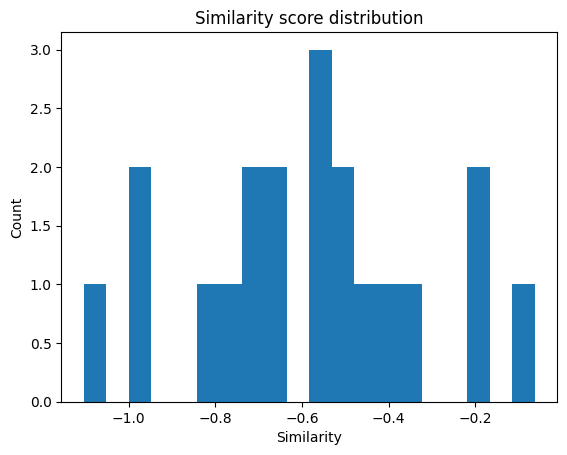

[0.08154473 0.07324822 0.0705602  0.05991489 0.05770727 0.05564588
 0.05214936 0.05178114 0.0493018  0.04870287 0.04858201 0.04566624
 0.04538631 0.04350486 0.0428712  0.04103881 0.03776486 0.03350609
 0.03234117 0.02878212]
2.9611573
Entropy: 2.9612  Uncertain
Current chunk count: 25
RAG Similarity: 0.9301

Non-RAG Similarity: 0.8642



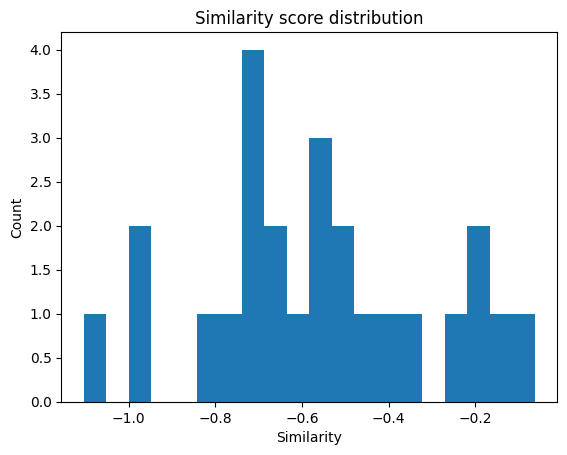

[0.06378029 0.06023805 0.05729116 0.05518873 0.05414272 0.04686249
 0.0451358  0.04352348 0.04078867 0.04050067 0.03856145 0.03809299
 0.03799846 0.03610612 0.03571789 0.03549895 0.03402737 0.03393684
 0.03353175 0.03342519 0.03209855 0.02953782 0.02620682 0.02529568
 0.02251196]
3.1837056
Entropy: 3.1837  Uncertain
Current chunk count: 30
RAG Similarity: 0.8780

Non-RAG Similarity: 0.8642



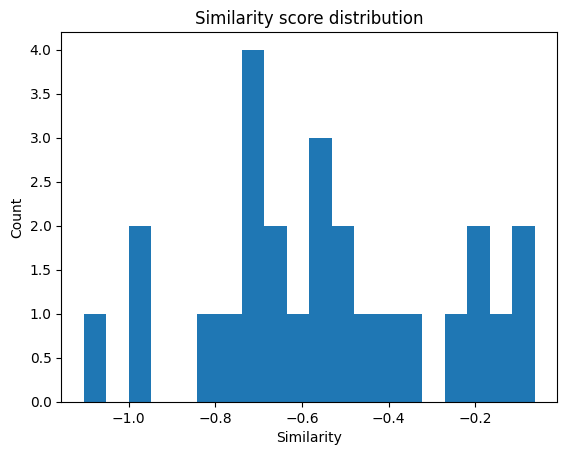

[0.06013078 0.05721995 0.05679123 0.05401297 0.05203084 0.05104468
 0.04418102 0.04255313 0.04103307 0.03845474 0.03818323 0.03635497
 0.03591331 0.03582419 0.03404013 0.03367412 0.0334677  0.03208032
 0.03199498 0.03161306 0.03151261 0.03026187 0.02784767 0.02470727
 0.02384826 0.02122383]
3.2207825
Entropy: 3.2208  Uncertain
No more chunks available to add.
RAG Similarity: 0.8829

Non-RAG Similarity: 0.8059



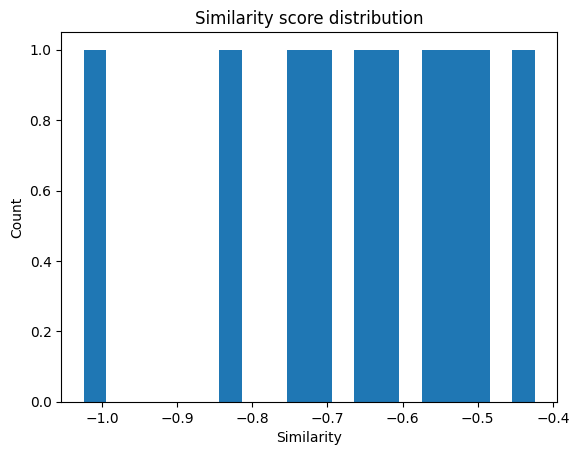

[0.12471197 0.11620442 0.11182662 0.10910374 0.10243179 0.10017467
 0.09271266 0.09138322 0.08301759 0.06843343]
2.2896087
Entropy: 2.2896  Uncertain
Current chunk count: 15
RAG Similarity: 0.8829

Non-RAG Similarity: 0.8059



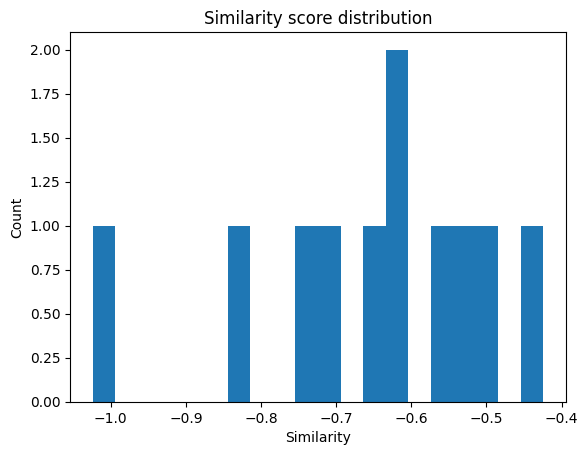

[0.11308891 0.10537426 0.10140447 0.09893536 0.09319913 0.09288523
 0.09083847 0.08407191 0.08286638 0.07528041 0.06205548]
2.3860967
Entropy: 2.3861  Uncertain
No more chunks available to add.
RAG Similarity: 0.8165

Non-RAG Similarity: 0.8533



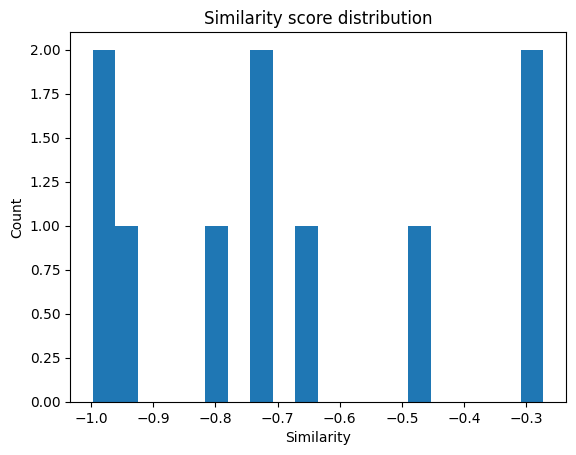

[0.14628395 0.14378434 0.11927091 0.10158844 0.09428564 0.09164494
 0.08492392 0.07437252 0.07302259 0.07082268]
2.268941
Entropy: 2.2689  Uncertain
Current chunk count: 15
RAG Similarity: 0.8165

Non-RAG Similarity: 0.8533



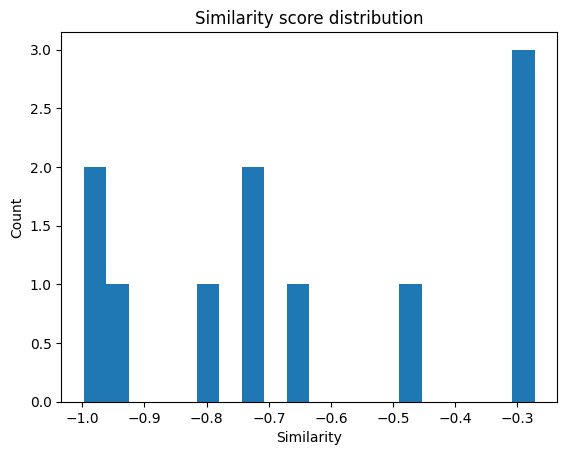

[0.12812857 0.12593919 0.12411062 0.10446813 0.08898024 0.0825838
 0.08027084 0.07438396 0.0651421  0.06395971 0.06203284]
2.3623772
Entropy: 2.3624  Uncertain
No more chunks available to add.
RAG Similarity: 0.7581

Non-RAG Similarity: 0.7494



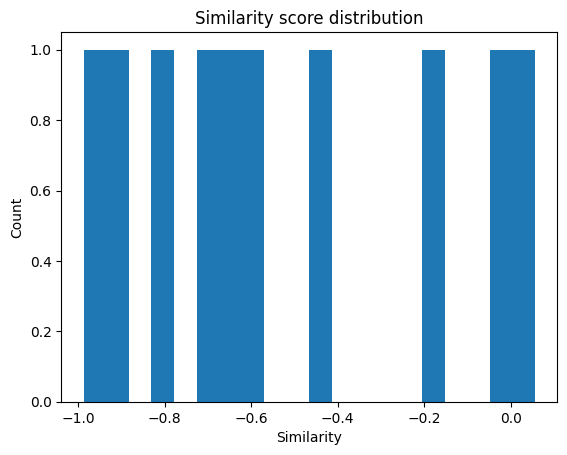

[0.1676899  0.15433794 0.13522309 0.09989662 0.08520135 0.08339753
 0.07830248 0.07161304 0.06524251 0.05909559]
2.2390158
Entropy: 2.2390  Uncertain
Current chunk count: 15
RAG Similarity: 0.7581

Non-RAG Similarity: 0.7494



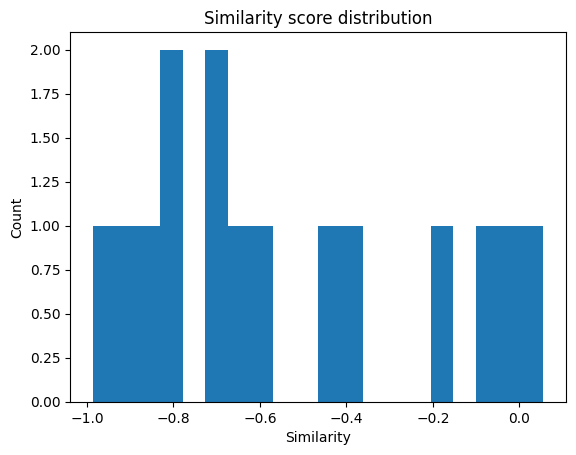

[0.11396854 0.10489404 0.09921911 0.09190284 0.07305621 0.06789361
 0.05790614 0.05668018 0.0532174  0.0529197  0.04874668 0.04867099
 0.0464195  0.04434133 0.04016365]
2.6498947
Entropy: 2.6499  Uncertain
Current chunk count: 20
RAG Similarity: 0.7581

Non-RAG Similarity: 0.7494



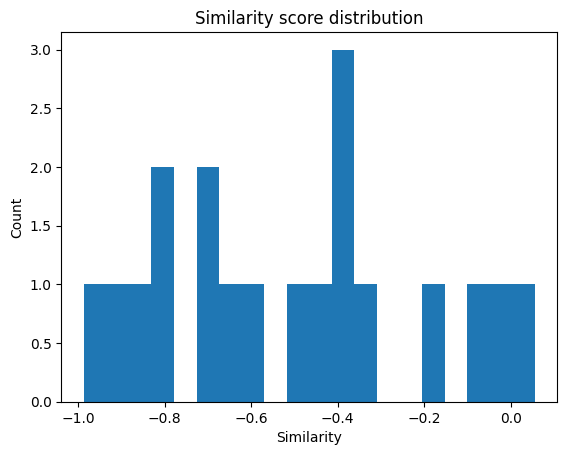

[0.08857995 0.08152696 0.07711623 0.07142979 0.05868942 0.05811641
 0.05678159 0.0558909  0.05276906 0.05007171 0.04500648 0.04405363
 0.04136224 0.04113086 0.03788746 0.03782863 0.0360787  0.03446348
 0.03121646]
2.898369
Entropy: 2.8984  Uncertain
No more chunks available to add.
RAG Similarity: 0.8286

Non-RAG Similarity: 0.7821



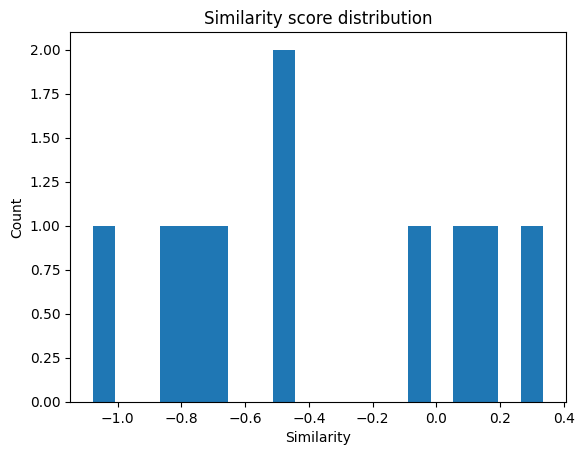

[0.18524377 0.15593798 0.14107373 0.12739246 0.08089022 0.07972548
 0.06594992 0.0619711  0.05685703 0.04495827]
2.2000835
Entropy: 2.2001  Uncertain
Current chunk count: 15
RAG Similarity: 0.8286

Non-RAG Similarity: 0.7821



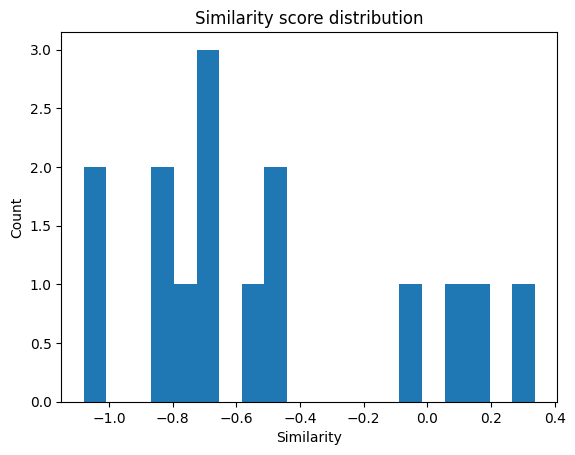

[0.14098026 0.11867701 0.10736454 0.09695236 0.06156171 0.06067529
 0.05828973 0.05215153 0.05019136 0.05017282 0.04716327 0.04411779
 0.04327119 0.03421561 0.03421561]
2.6051986
Entropy: 2.6052  Uncertain
Current chunk count: 20
RAG Similarity: 0.8286

Non-RAG Similarity: 0.7821



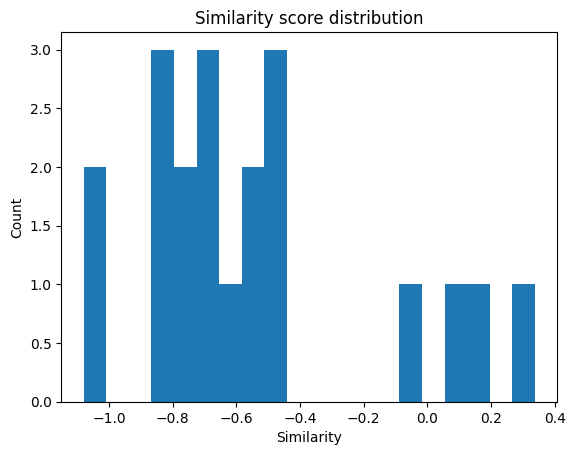

[0.1117546  0.09407488 0.08510752 0.07685383 0.04879977 0.04822189
 0.0480971  0.04620608 0.04485525 0.04184955 0.04134035 0.03978653
 0.03977183 0.03769775 0.03738617 0.03497203 0.03467879 0.03430093
 0.0271226  0.0271226 ]
2.9077113
Entropy: 2.9077  Uncertain
Current chunk count: 25
RAG Similarity: 0.8504

Non-RAG Similarity: 0.7821



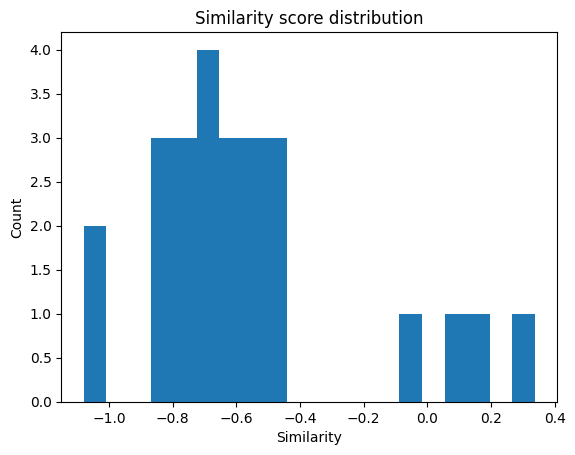

[0.09213771 0.07756141 0.07016814 0.06336326 0.04023368 0.03975724
 0.03965436 0.0390837  0.03809528 0.03698157 0.03576664 0.03513802
 0.03450347 0.03414515 0.03408366 0.03280258 0.03279047 0.03140187
 0.03108046 0.03082357 0.0288332  0.02859144 0.02827991 0.02236163
 0.02236163]
3.1439347
Entropy: 3.1439  Uncertain
Current chunk count: 30
RAG Similarity: 0.8552

Non-RAG Similarity: 0.7821



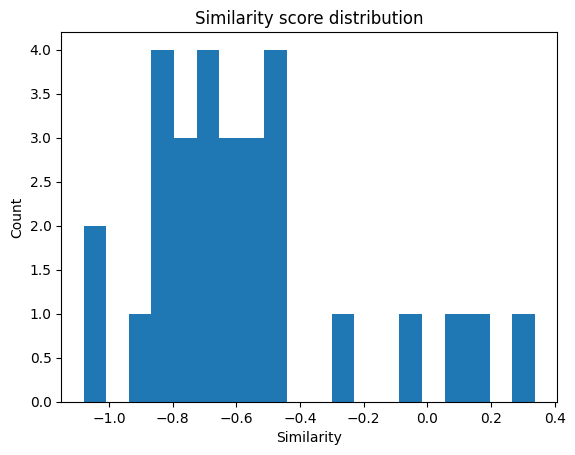

[0.0802209  0.06752986 0.06109281 0.05516805 0.04497669 0.03550323
 0.03502998 0.03461516 0.03452558 0.03402874 0.03316815 0.03219848
 0.03114069 0.03059338 0.0300409  0.02972892 0.02967538 0.02856
 0.02854945 0.02734045 0.02706061 0.02683694 0.025104   0.0249654
 0.02489351 0.02462227 0.02389155 0.01946944 0.01946944]
3.2972546
Entropy: 3.2973  Uncertain
No more chunks available to add.
RAG Similarity: 0.3632

Non-RAG Similarity: 0.8692



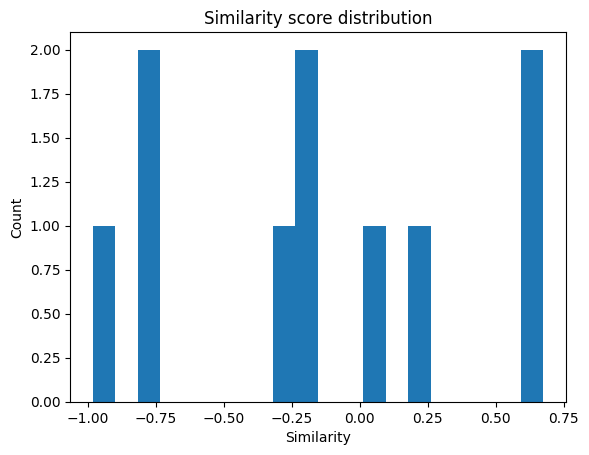

[0.19987334 0.18683194 0.12486718 0.11112504 0.08517177 0.08179791
 0.07877209 0.04787396 0.0456129  0.03807386]
2.1646757
Entropy: 2.1647  Uncertain
Current chunk count: 15
RAG Similarity: 0.3522

Non-RAG Similarity: 0.8692



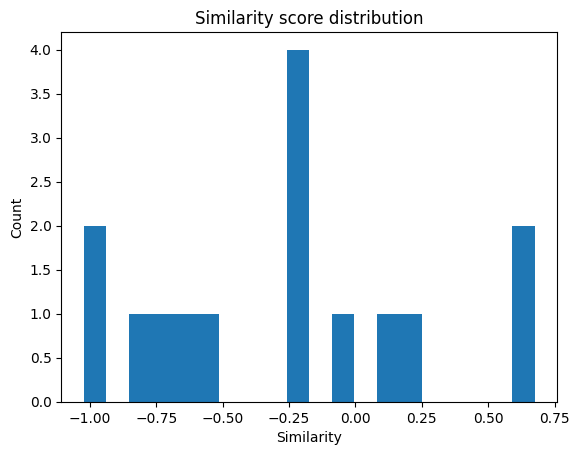

[0.1506284  0.14080015 0.09410231 0.08374597 0.07543726 0.06418709
 0.06164448 0.06020664 0.05936417 0.04379735 0.03936864 0.03607874
 0.03437476 0.02869319 0.0275708 ]
2.572021
Entropy: 2.5720  Uncertain
Current chunk count: 20
RAG Similarity: 0.4982

Non-RAG Similarity: 0.8692



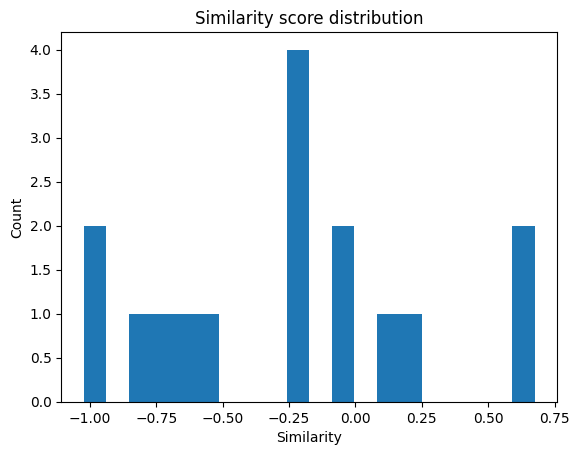

[0.1407491  0.13156545 0.0879304  0.0782533  0.07048954 0.06558731
 0.05997724 0.05760139 0.05625785 0.05547063 0.0409248  0.03678656
 0.03371244 0.03212022 0.02681128 0.02576251]
2.6454015
Entropy: 2.6454  Uncertain
No more chunks available to add.
RAG Similarity: 0.9394

Non-RAG Similarity: 0.8165



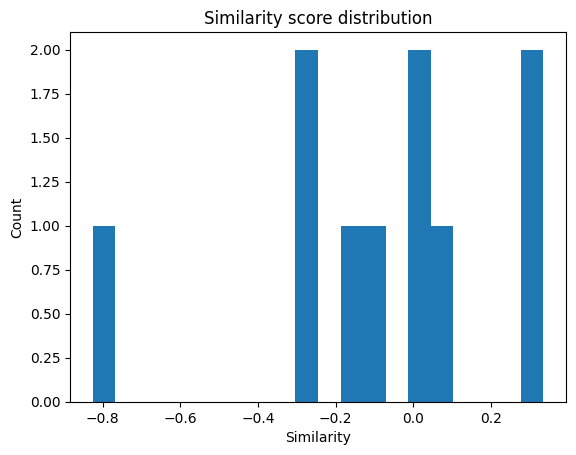

[0.14605317 0.14559804 0.11367012 0.10610264 0.10370696 0.09209052
 0.08765339 0.07994398 0.07949322 0.04568801]
2.259004
Entropy: 2.2590  Uncertain
No more chunks available to add.
RAG Similarity: 0.8825

Non-RAG Similarity: 0.3747



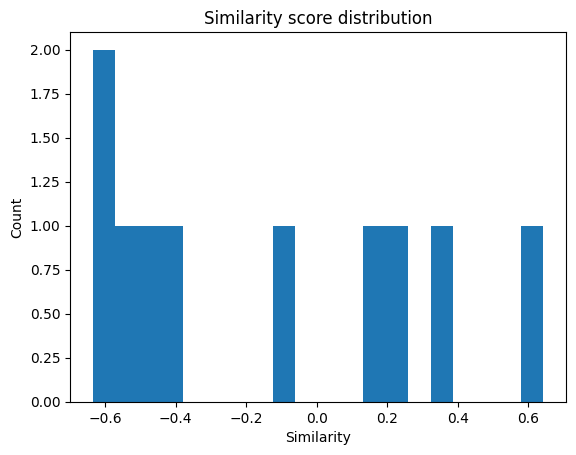

[0.19630255 0.14825544 0.13343884 0.11956073 0.09565959 0.07039389
 0.06222553 0.06173461 0.05781071 0.05461807]
2.2049172
Entropy: 2.2049  Uncertain
No more chunks available to add.
RAG Similarity: 0.9002

Non-RAG Similarity: 0.7387



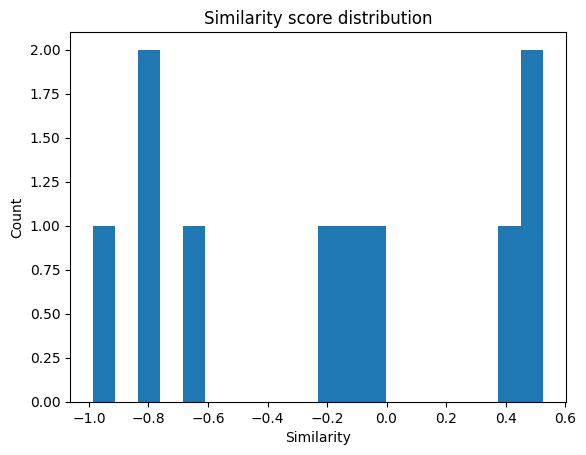

[0.18147099 0.1751339  0.16500647 0.10481185 0.09315251 0.08633254
 0.05532496 0.04963986 0.04924179 0.0398852 ]
2.1670935
Entropy: 2.1671  Uncertain
Current chunk count: 15
RAG Similarity: 0.8887

Non-RAG Similarity: 0.7387



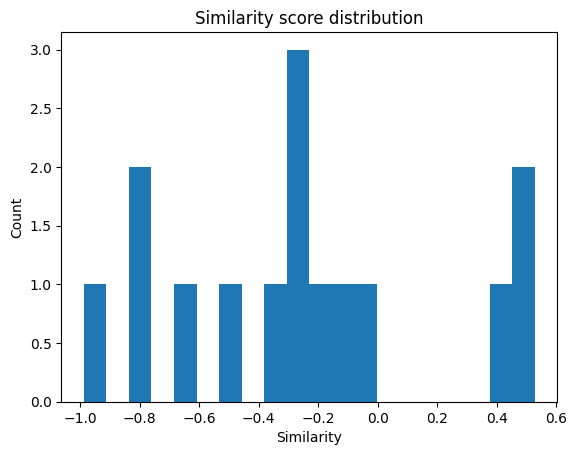

[0.13070542 0.1261411  0.11884677 0.07549129 0.06709358 0.06218146
 0.05888051 0.05855844 0.05839813 0.05615286 0.04775476 0.03984809
 0.03575337 0.03546665 0.02872752]
2.602984
Entropy: 2.6030  Uncertain
No more chunks available to add.
RAG Similarity: 0.9189

Non-RAG Similarity: 0.8339



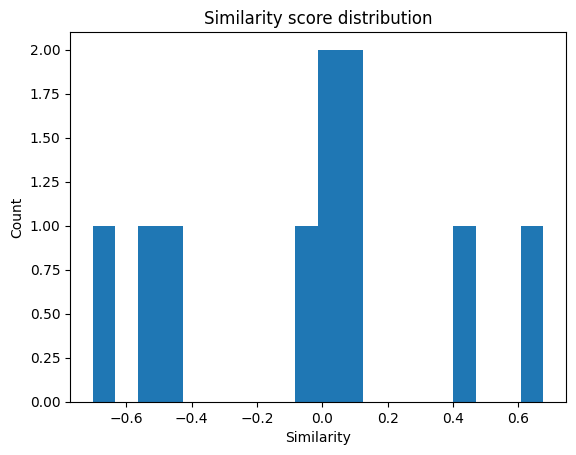

[0.19057743 0.15172596 0.1040212  0.10382009 0.0975202  0.09600873
 0.08922612 0.0629717  0.05622625 0.04790229]
2.2217202
Entropy: 2.2217  Uncertain
Current chunk count: 15
RAG Similarity: 0.8827

Non-RAG Similarity: 0.8339



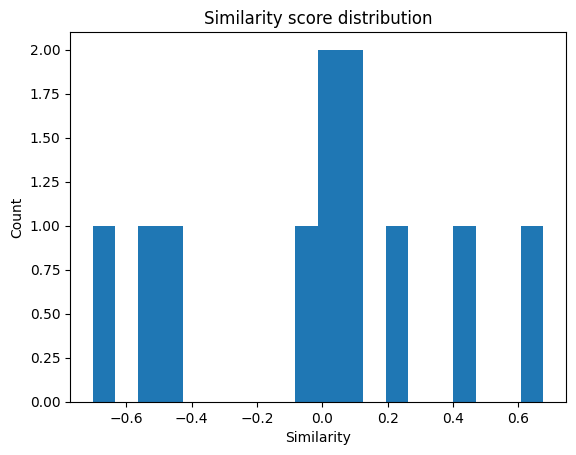

[0.16948247 0.13493146 0.1106898  0.09250712 0.09232827 0.08672572
 0.08538155 0.0793497  0.05600138 0.05000259 0.0426    ]
2.3237536
Entropy: 2.3238  Uncertain
No more chunks available to add.
RAG Similarity: 0.4952

Non-RAG Similarity: 0.8357



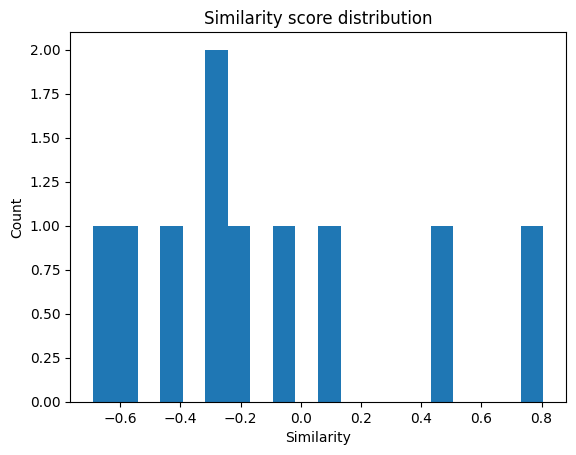

[0.2255844  0.1581437  0.1120624  0.09430218 0.08125507 0.07894361
 0.07711059 0.06488551 0.05728898 0.05042353]
2.1894343
Entropy: 2.1894  Uncertain
Current chunk count: 15
RAG Similarity: 0.5226

Non-RAG Similarity: 0.8357



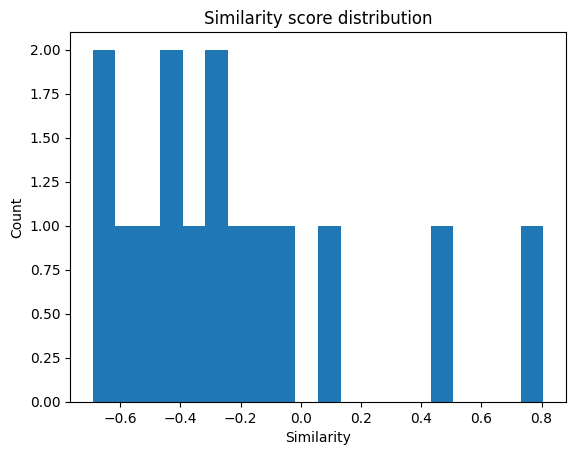

[0.16879143 0.11832955 0.08384965 0.07056072 0.06428139 0.06079835
 0.05906882 0.05769728 0.05416901 0.04854998 0.04841636 0.04523578
 0.04286595 0.0396568  0.03772894]
2.6042304
Entropy: 2.6042  Uncertain
Current chunk count: 20
RAG Similarity: 0.9523

Non-RAG Similarity: 0.8357



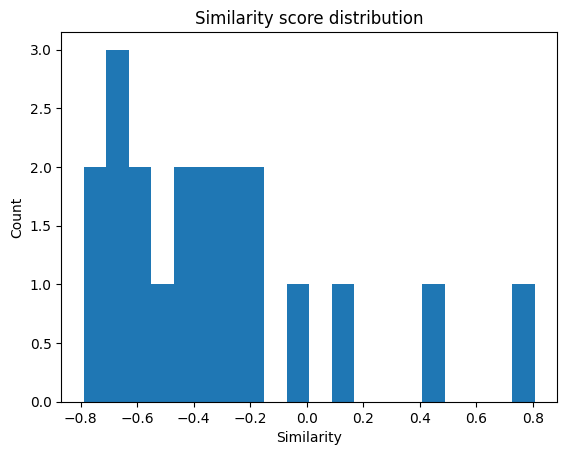

[0.14019328 0.09828112 0.0696431  0.0586057  0.05339026 0.05049736
 0.04906086 0.0479217  0.04581937 0.04499121 0.04032421 0.04021323
 0.03757153 0.03560322 0.03484422 0.03293779 0.03133656 0.03129549
 0.02903216 0.02843756]
2.8878284
Entropy: 2.8878  Uncertain
Current chunk count: 25
RAG Similarity: 0.9348

Non-RAG Similarity: 0.8357



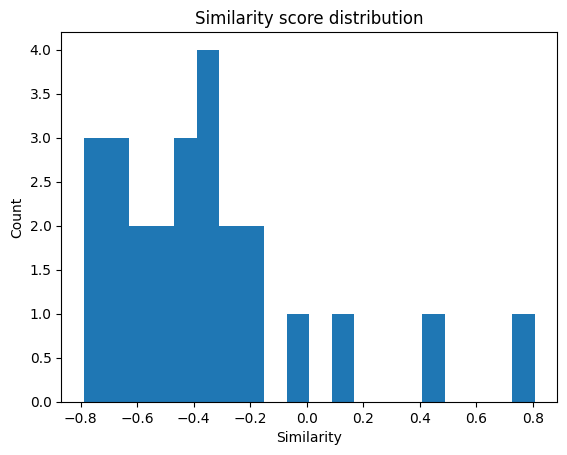

[0.11684068 0.08191001 0.05804235 0.0488435  0.04449682 0.04208579
 0.04088858 0.03993917 0.03820112 0.03818704 0.03749683 0.03735419
 0.03462893 0.03360724 0.03351474 0.03170359 0.03131308 0.02967264
 0.02904006 0.0274512  0.0261167  0.02608247 0.02468656 0.02419615
 0.02370059]
3.1234226
Entropy: 3.1234  Uncertain
Current chunk count: 30
RAG Similarity: 0.9699

Non-RAG Similarity: 0.8357



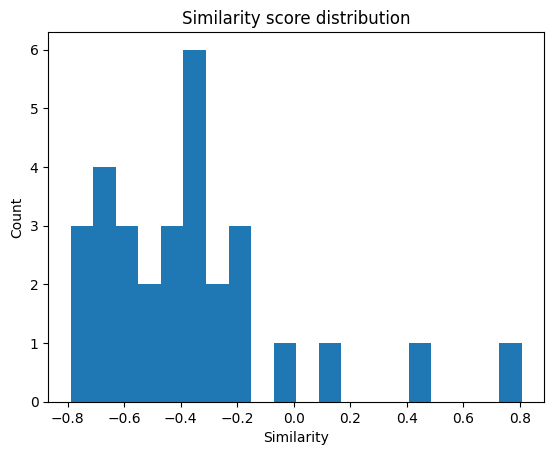

[0.09982059 0.06997824 0.04958737 0.0417285  0.038015   0.03638167
 0.03595519 0.03493237 0.03412127 0.03263639 0.03262436 0.0320347
 0.03191284 0.03136832 0.03074224 0.02958456 0.0287117  0.02863267
 0.02708535 0.02675173 0.02535025 0.02480982 0.02455638 0.02345241
 0.02262054 0.0223123  0.02228305 0.02109049 0.02067151 0.02024815]
3.3158727
Entropy: 3.3159  Uncertain
Current chunk count: 35
RAG Similarity: 0.3077

Non-RAG Similarity: 0.8357



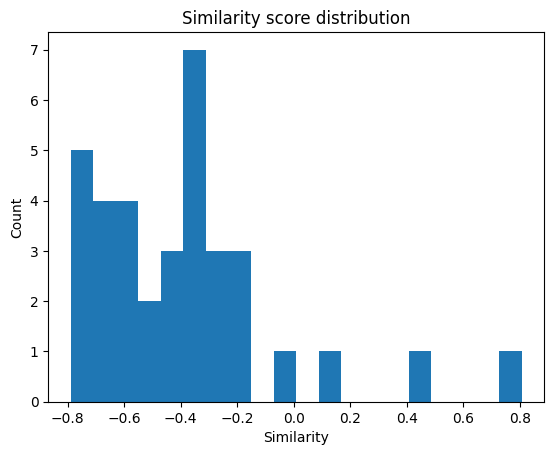

[0.08799031 0.06168474 0.0437105  0.03678303 0.03350963 0.03206988
 0.03169394 0.03099101 0.03079235 0.03007737 0.02876847 0.02875787
 0.02823809 0.02813067 0.02765069 0.02743943 0.0270988  0.02607833
 0.02530892 0.02523926 0.02387532 0.02358123 0.0225167  0.02234585
 0.02186947 0.02164607 0.02067294 0.01993965 0.01966795 0.01964217
 0.01923995 0.01859094 0.01832845 0.01822162 0.01784843]
3.475149
Entropy: 3.4751  Uncertain
No more chunks available to add.
RAG Similarity: 0.9613

Non-RAG Similarity: 0.8776



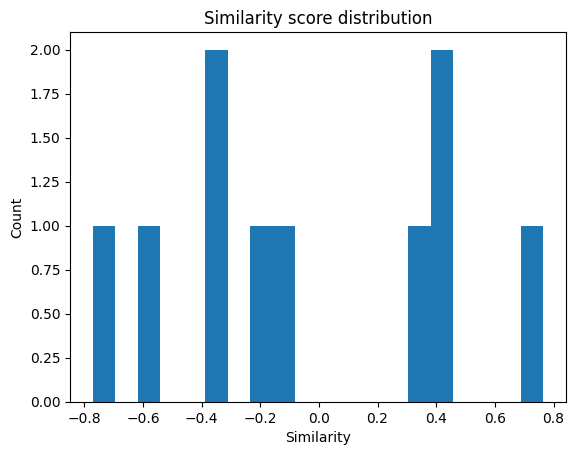

[0.1986286  0.1432448  0.13987137 0.13503149 0.08431471 0.07320262
 0.06532995 0.06426047 0.05341636 0.04269963]
2.1905847
Entropy: 2.1906  Uncertain
Current chunk count: 15
RAG Similarity: 0.9594

Non-RAG Similarity: 0.8776



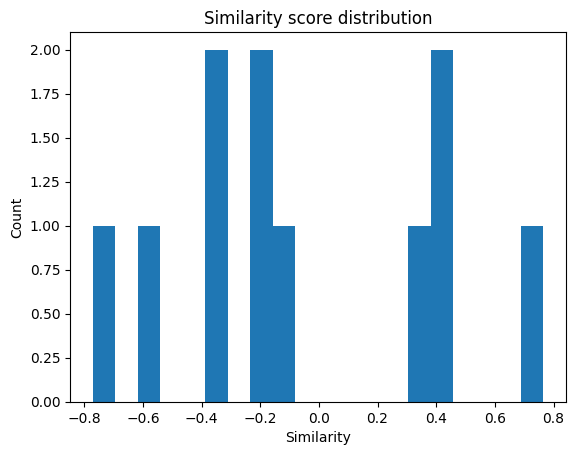

[0.18499756 0.13341452 0.1302726  0.12576485 0.07852855 0.0686257
 0.06817904 0.06084663 0.05985054 0.04975062 0.03976933]
2.2903237
Entropy: 2.2903  Uncertain
No more chunks available to add.
RAG Similarity: 0.9467

Non-RAG Similarity: 0.6266



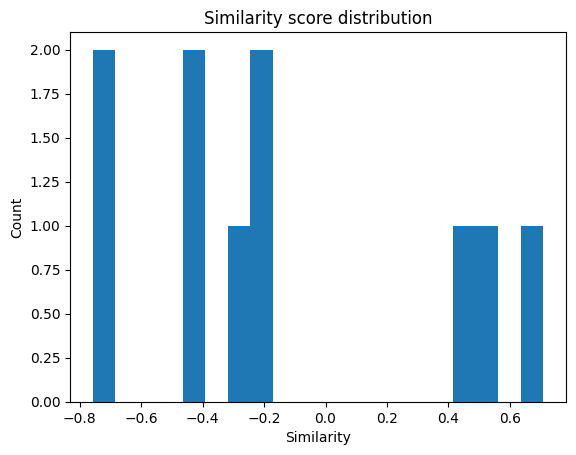

[0.20530337 0.17063689 0.15557766 0.08434617 0.08337203 0.07407717
 0.06624884 0.06411227 0.04895955 0.04736602]
2.17285
Entropy: 2.1728  Uncertain
Current chunk count: 15
RAG Similarity: 0.9583

Non-RAG Similarity: 0.6266



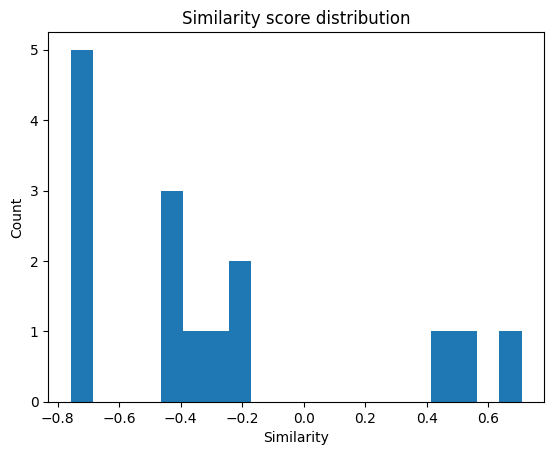

[0.15995559 0.13294631 0.12121339 0.06571563 0.06495667 0.05771486
 0.05389788 0.05296538 0.05161568 0.04995104 0.03931664 0.03814527
 0.03744174 0.03726017 0.03690373]
2.5732124
Entropy: 2.5732  Uncertain
Current chunk count: 20
RAG Similarity: 0.9391

Non-RAG Similarity: 0.6266



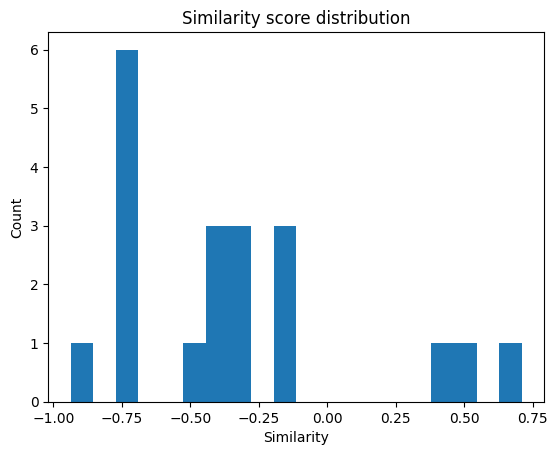

[0.12820925 0.10656049 0.0971562  0.0531823  0.05267307 0.05206474
 0.04626021 0.04594723 0.0444219  0.04320078 0.04245335 0.04137152
 0.04003727 0.03151348 0.03057459 0.0301803  0.03001069 0.02986515
 0.02957946 0.02473805]
2.8728952
Entropy: 2.8729  Uncertain
No more chunks available to add.
RAG Similarity: 0.6773

Non-RAG Similarity: 0.9034



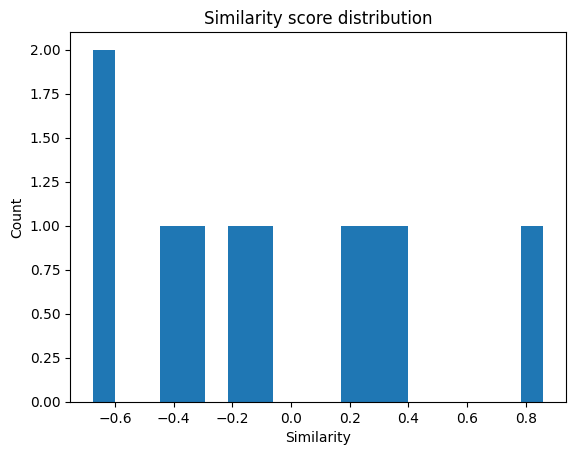

[0.22456072 0.13537604 0.12389782 0.11666919 0.08870995 0.07905661
 0.0693192  0.06530163 0.048804   0.0483048 ]
2.1879754
Entropy: 2.1880  Uncertain
Current chunk count: 15
RAG Similarity: 0.9579

Non-RAG Similarity: 0.9034



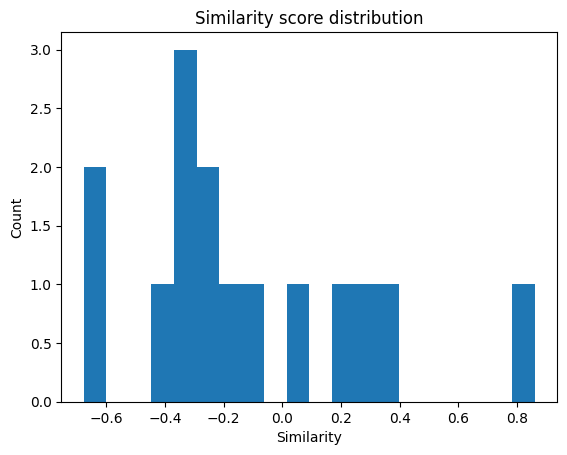

[0.16205648 0.09769546 0.08941209 0.08419548 0.07353421 0.06401841
 0.05705198 0.05321866 0.05155537 0.05021092 0.05002489 0.04982096
 0.04712557 0.03521989 0.03485964]
2.6149166
Entropy: 2.6149  Uncertain
Current chunk count: 20
RAG Similarity: 0.9579

Non-RAG Similarity: 0.9034



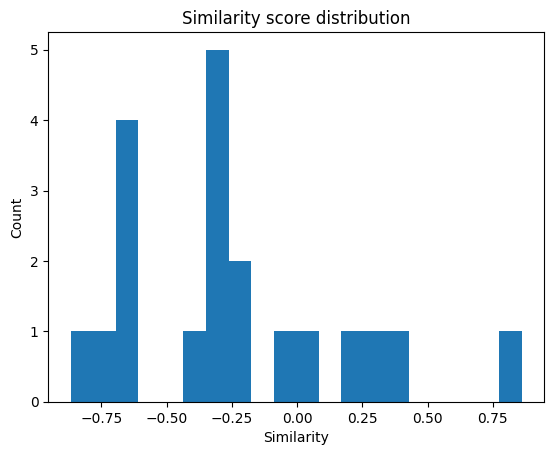

[0.1365719  0.08233213 0.07535138 0.07095512 0.06197041 0.05395105
 0.04808014 0.04484964 0.04401482 0.0434479  0.04231488 0.0421581
 0.04198625 0.03971472 0.03085671 0.02990419 0.0296813  0.02937771
 0.02823006 0.02425151]
2.8885512
Entropy: 2.8886  Uncertain
Current chunk count: 25
RAG Similarity: 0.9579

Non-RAG Similarity: 0.9034



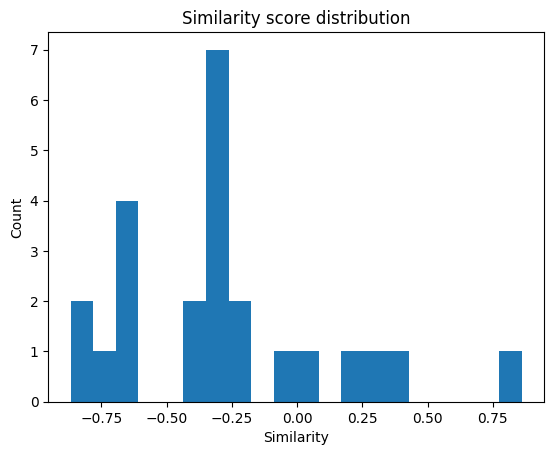

[0.11876137 0.07159509 0.0655247  0.06170177 0.05388876 0.04691522
 0.04180994 0.03900073 0.03827478 0.0377818  0.03751921 0.03679654
 0.03666021 0.03651076 0.03638192 0.0348031  0.03453547 0.02683264
 0.02600434 0.02581052 0.02554652 0.02454854 0.02170722 0.02108883]
3.077105
Entropy: 3.0771  Uncertain
No more chunks available to add.
RAG Similarity: 0.9036

Non-RAG Similarity: 0.5750



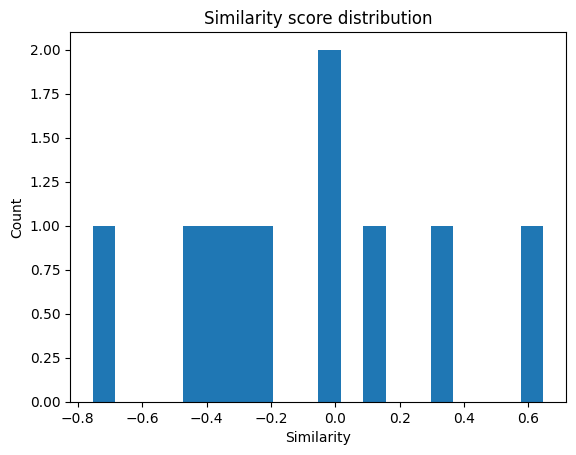

[0.19476017 0.14597578 0.11152103 0.10312768 0.10226095 0.08336288
 0.07407098 0.06940087 0.06754947 0.04797019]
2.2244072
Entropy: 2.2244  Uncertain
Current chunk count: 15
RAG Similarity: 0.9025

Non-RAG Similarity: 0.5750



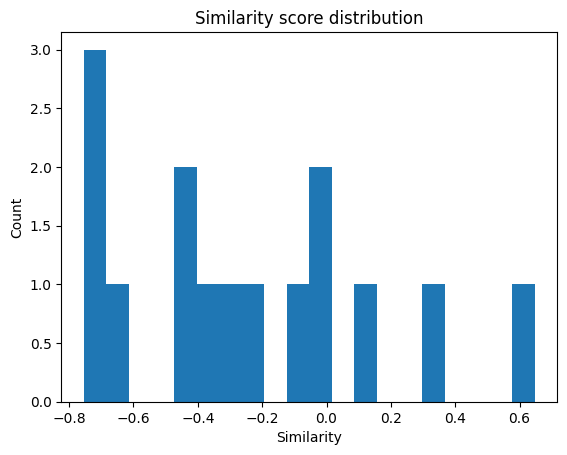

[0.14830033 0.11115342 0.08491781 0.07852668 0.07786671 0.06970039
 0.06347676 0.05640142 0.05284537 0.05143561 0.05090159 0.04095152
 0.03902908 0.03796632 0.03652696]
2.620157
Entropy: 2.6202  Uncertain
Current chunk count: 20
RAG Similarity: 0.8835

Non-RAG Similarity: 0.5750



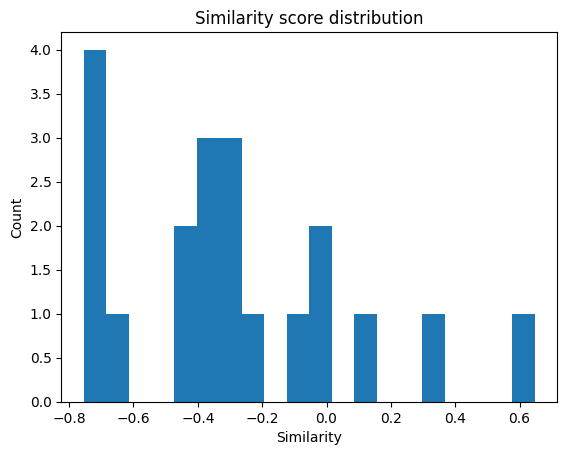

[0.11780671 0.08829796 0.06745694 0.06237996 0.0618557  0.05536854
 0.05042461 0.04519358 0.04480411 0.04471026 0.0431129  0.04267604
 0.04197926 0.04085938 0.04043517 0.03253104 0.03100389 0.03015966
 0.0299281  0.02901625]
2.918321
Entropy: 2.9183  Uncertain
No more chunks available to add.


In [ ]:
outer_loop_var=True
attempt_logs = []

for idx, row in df.iterrows():
  initial_chunk_count = 10
  current_chunk_count = initial_chunk_count
  add_chunk_count = 5
  report_name = row['Report Name']
  query = row['Question']
  chatGPT_answer = row['Answer']
  url = f"https://talosintelligence.com/vulnerability_reports/{report_name}"

  chunks = get_chunks_from_url(url)

  if not chunks:
      print(f"No chunks found for {report_name}")
      continue

  db = build_vectorstore(chunks, initial_chunk_count)

  while True:
      is_uncertain, rag_response_clean, non_rag_response_clean, rag_score, nonrag_score, entropy = evaluate_rag_with_uncertainty_prompt(query, chatGPT_answer, db, chunks, current_chunk_count)

      attempt_logs.append({
          "report_name": report_name,
          "query": query,
          "chatgpt_answer": chatGPT_answer,
          "chunk_count": current_chunk_count,
          "rag_answer": rag_response_clean,
          "non_rag_answer": non_rag_response_clean,
          "rag_similarity": rag_score,
          "non_rag_similarity": nonrag_score,
          "is_uncertain": is_uncertain,
          "entropy": entropy
      })

      if not is_uncertain:
          outer_loop_var=False
          break


      current_chunk_count += add_chunk_count
      more_docs = chunks[current_chunk_count - add_chunk_count:current_chunk_count]

      if more_docs:
          db.add_documents(more_docs)
      else:
          print("No more chunks available to add.")
          break

      print(f"Current chunk count: {current_chunk_count}")

In [ ]:
attempt_logs

[{'report_name': 'TALOS-2024-1984',
  'query': "What vulnerability was discovered in the LevelOne WBR-6012 router's firmware version R0.40e6, and what risk does it pose?",
  'chatgpt_answer': 'A vulnerability in the LevelOne WBR-6012 router’s web application (firmware version R0.40e6) allows attackers to change the administrator password without needing the current one. This flaw enables unauthorized users to escalate privileges and potentially take full control of the router.',
  'chunk_count': 10,
  'rag_answer': "The vulnerability discovered in the LevelOne WBR-6012 router's firmware version R0.40e6 is a password change vulnerability. This vulnerability allows attackers to change the administrator password and gain higher privileges without the current password.",
  'non_rag_answer': "**Vulnerability:**\n\nA critical vulnerability has been discovered in the firmware version R0.40e6 of the LevelOne WBR-6012 router. The vulnerability is a buffer overflow vulnerability that could poten

In [ ]:
from collections import defaultdict

best_per_question = {}

for item in attempt_logs:
    q = item["query"]
    if q not in best_per_question or item["rag_similarity"] > best_per_question[q]["rag_similarity"]:
        best_per_question[q] = item

result = list(best_per_question.values())

In [ ]:
df = pd.DataFrame(result)

df.to_excel("rag_gemma_entropy_attempt_logs.xlsx", index=False)

In [ ]:
files.download("rag_gemma_entropy_attempt_logs.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>